# 3) Video Segmentation

A colour histogram h(.) can be generated by counting how many times each colour occurs in an image.
Histogram intersection can be used to match a pair of histograms. Given a pair of histograms, e.g., of an
input image I and a model M, each containing n bins, the intersection of the histograms is defined as
∑n min[h(I ), h(Mj)].

In [1]:
#Importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Reading the video file

In [2]:
def ICV_load_video(filepath):
    """
    param filepath : Path to the video file
    Returns : The frames in the video specified in the file path
    """
    capture = cv2.VideoCapture(filepath)
    frames = []
    
    while capture.isOpened():
    #Readiing a new frame
        ret, frame = capture.read()
        if ret == True:
            frames.append(frame)
            #cv2.imshow("frame", frame)
            k = cv2.waitKey(1) & 0xff
    
        #Breaking the while loop if failed to read a new frame
        else:
            break

    capture.release()
    cv2.destroyAllWindows()
    return frames

In [3]:
filepath = "Dataset/DatasetB.avi"
frames = ICV_load_video(filepath)
len(frames)

348

In [4]:
def ICV_histogram(bgr_image, show_plot = False, plot_type = None, name = None):
    """
    param bgr_image : BGR Image whose colour histogram is needed
    param show_plot : Boolean value specifying if the histogram has to be displayed or not
    param plot_type : String specifying the type of plot - Line histogram or Bar Histogram
    param name : String to distinguish saved file names
    Returns : The histogram of different colour channels of the image
    """
    blue_histogram = np.zeros((256))
    green_histogram = np.zeros((256))
    red_histogram = np.zeros((256))
    
    
    #Iterating over the histogram bins and finding the corrsponding value of histogram from the image
    for i in range(blue_histogram.shape[0]):
        blue_histogram[i] = np.sum(bgr_image[:, :, 0] == i)
        green_histogram[i] = np.sum(bgr_image[:, :, 1] == i)
        red_histogram[i] = np.sum(bgr_image[:, :, 2] == i)
    
    #Plotting the histogram
    if show_plot:
        ICV_plot_histogram(blue_histogram, green_histogram, red_histogram, plot_type, name)
          
    return blue_histogram, green_histogram, red_histogram
    

In [5]:
def ICV_plot_histogram(blue_histogram, green_histogram, red_histogram, plot_type, name):
    """
    Function to plot histograms of different colour channels
    param blue_histogram : Histogram of blue colour channel
    param green_histogram : Histogram of green colour channel
    param red_histogram : Histogram of red colour channel
    param plot_type : String specifying the type of plot - Line histogram or Bar Histogram
    param name : String to distinguish saved file names
    """
    #Initializing the bins
    x_axis = np.arange(blue_histogram.shape[0])
    
    #Plotting bar histogram
    if plot_type == "bar":
        plt.bar(x_axis, blue_histogram, color = 'b')
        plt.bar(x_axis, green_histogram, color = 'g')
        plt.bar(x_axis, red_histogram, color = 'r')
        plt.xlabel("Pixel values")
        plt.ylabel("Count of  Pixels")
        plt.savefig("Bar histogram for frame{}.png".format(name))
        plt.show()
    #Plotting line histogram
    else:
        plt.plot(x_axis, blue_histogram, color = 'b')
        plt.plot(x_axis, green_histogram, color = 'g')
        plt.plot(x_axis, red_histogram, color = 'r')
        plt.xlabel("Pixel values")
        plt.ylabel("Count of  Pixels")
        plt.savefig("Line histogram for frame {}.png".format(name))
        plt.show()
        

In [6]:
def ICV_histogram_video_sequence(frames):
    """
    Function to construct histogram of all the frames in a video sequence
    param frames : Different frames of a video
    """
    for i, frame in enumerate(frames):
        print("Frame Number " + str(i))
        ICV_histogram(frame, True, "bar", i)

In [7]:
def ICV_histogram_intersection(blue_histogram_1, green_histogram_1, red_histogram_1, blue_histogram_2, green_histogram_2, red_histogram_2, show_plot = False):
    """
    param blue_histogram_1 : Histogram of blue colour channel of frame 1
    param green_histogram_1 : Histogram of green colour channel of frame 1
    param red_histogram_1 : Histogram of red colour channel of frame 1
    param blue_histogram_2 : Histogram of blue colour channel of frame 2
    param green_histogram_2 : Histogram of green colour channel of frame 2
    param red_histogram_2 : Histogram of blue red channel of frame 2
    param show_plot : Boolean value specifying if the histogram has to be displayed or not
    Returns : The histogram intersection of different colour channels
    """
    blue_intersection = np.zeros((256))
    green_intersection = np.zeros((256))
    red_intersection = np.zeros((256))
    
    
    for i in range(256):
        blue_intersection[i] = min(blue_histogram_1[i], blue_histogram_2[i])
        green_intersection[i] = min(green_histogram_1[i], green_histogram_2[i])
        red_intersection[i] = min(red_histogram_1[i], red_histogram_2[i])
    
    if show_plot:
        ICV_plot_histogram(blue_intersection, green_intersection, red_intersection, "bar", " intersection")

    return np.sum(blue_intersection), np.sum(green_intersection), np.sum(red_intersection)
    

In [8]:
def ICV_histogram_intersection_video(frames, show_plot = False, plot_type = None):
    """
    param frames : Frames of the video for which histogram intersection has to be calculated for consecutive frames
    param show_plot : Boolean value specifying if the histogram has to be displayed or not
    param plot_type : String specifying the type of plot - Line histogram or Bar Histogram
    Returns : The histogram intersection of different colour channels for two consecutive frames of the video
    """
    #List to store intersections of consequtive frames
    blue_intersections = []
    green_intersections = []
    red_intersections = []
    
    for i in range(0,len(frames)-1):
        #Computing histogram of two consequtive frames
        blue_histogram_1, green_histogram_1, red_histogram_1 = ICV_histogram(frames[i], False)
        blue_histogram_2, green_histogram_2, red_histogram_2 = ICV_histogram(frames[i + 1], False)
        
        #Compute intersection of histogram of two consequtive frames
        blue_intersection, green_intersection, red_intersection = ICV_histogram_intersection(blue_histogram_1, green_histogram_1, red_histogram_1, blue_histogram_2, green_histogram_2, red_histogram_2, False)
        
        #Appending histogram intersection of each consecutive frame to the list of intersections
        blue_intersections.append(blue_intersection)
        green_intersections.append(green_intersection)
        red_intersections.append(red_intersection)
        
    blue_intersections = np.array(blue_intersections)
    green_intersections = np.array(green_intersections)
    red_intersections = np.array(red_intersections)
    
    if show_plot:
        ICV_plot_histogram(blue_intersections, green_intersections, red_intersections, plot_type, "intersections" )
    
    return blue_intersections, green_intersections, red_intersections
        

In [9]:
def ICV_normalize_histogram(histogram, pixels):
    """
    param histogram : Histogram that has to be normalized
    param pixels : The number of pixels in the histogram
    """
    normalized_histogram = np.array(histogram) / pixels
    return normalized_histogram

<b>a) Write a histogram function that returns the colour histogram of an input image. Visualize the histogram and save the corresponding figure. For a given video sequence, use the above function to construct the histogram of each frame.</b>

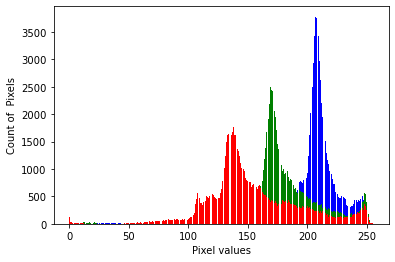

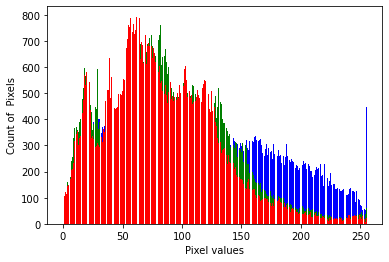

In [10]:
#Histograms of two non consecutive frames
image_1 = frames[0]
cv2.imwrite("non consecutive frame 1.jpg", image_1)
image_2 = frames[100]
cv2.imwrite("non consecutive frame 2.jpg", image_2)    

blue_histogram_1, green_histogram_1, red_histogram_1 = ICV_histogram(image_1,  True, "bar", " non consecutive 1")

blue_histogram_2, green_histogram_2, red_histogram_2 = ICV_histogram(image_2,  True, "bar", " non consecutive 2")


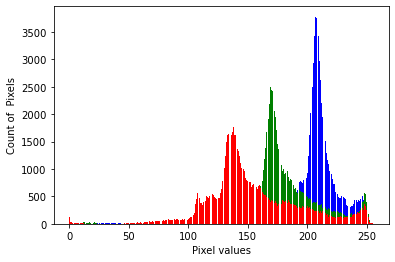

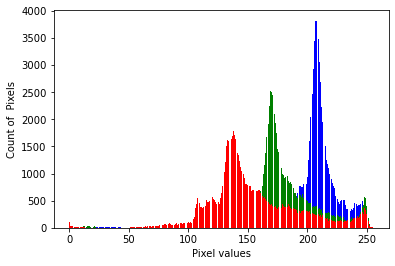

In [11]:
#Bar Histograms of two consecutive frames
image_1 = frames[0]
cv2.imwrite("consecutive frame 1.jpg", image_1)
image_2 = frames[1]
cv2.imwrite("consecutive frame 2.jpg", image_2)    

blue_histogram_1, green_histogram_1, red_histogram_1 = ICV_histogram(image_1,  True, "bar", " consecutive 1")

blue_histogram_2, green_histogram_2, red_histogram_2 = ICV_histogram(image_2,  True, "bar", "consecutive 2")

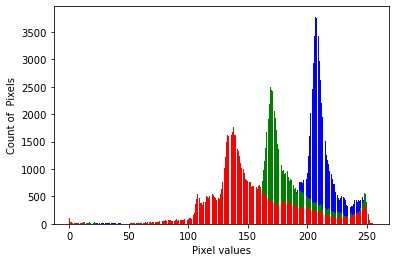

In [12]:
blue, green, red = ICV_histogram_intersection(blue_histogram_1, green_histogram_1, red_histogram_1, blue_histogram_2, green_histogram_2, red_histogram_2, True)

Frame Number 0


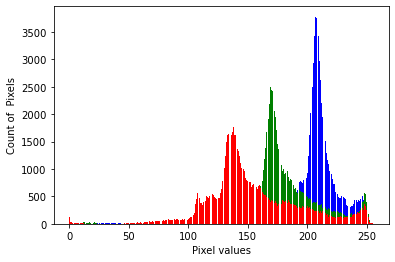

Frame Number 1


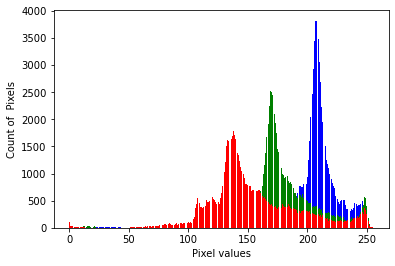

Frame Number 2


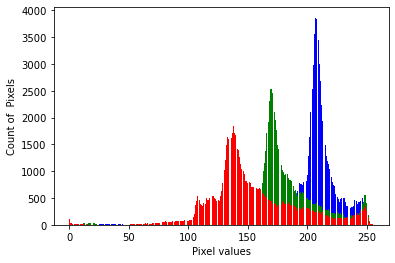

Frame Number 3


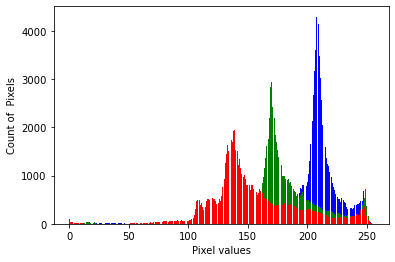

Frame Number 4


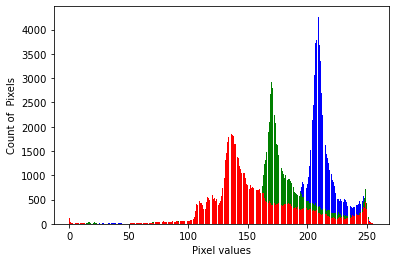

Frame Number 5


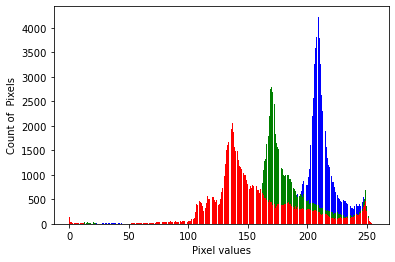

Frame Number 6


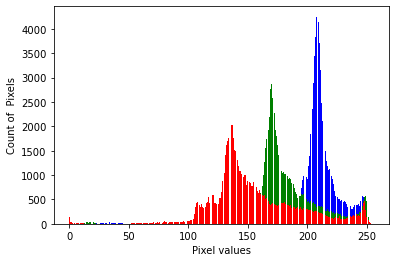

Frame Number 7


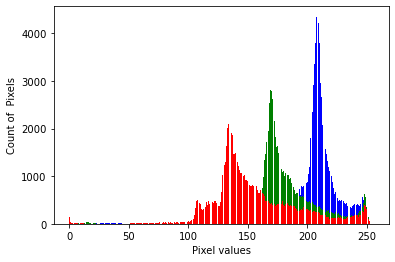

Frame Number 8


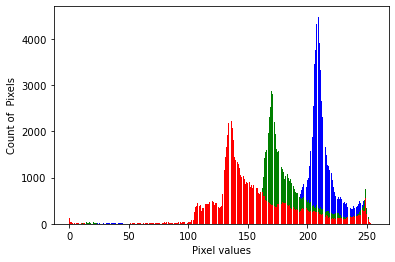

Frame Number 9


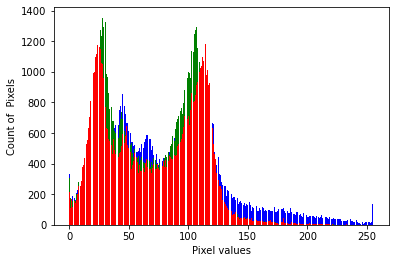

Frame Number 10


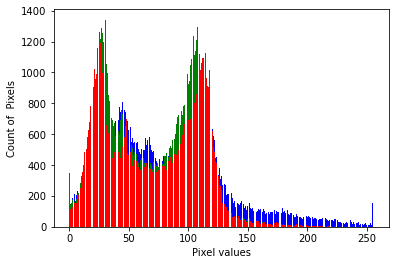

Frame Number 11


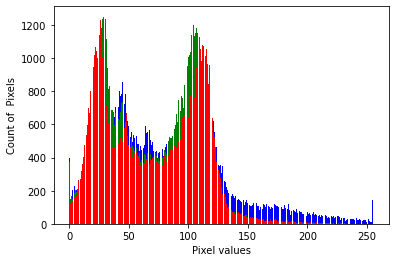

Frame Number 12


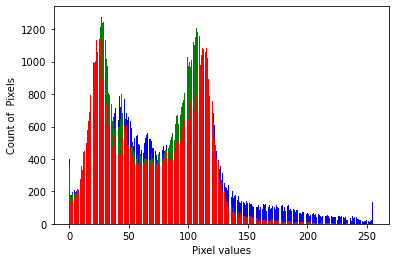

Frame Number 13


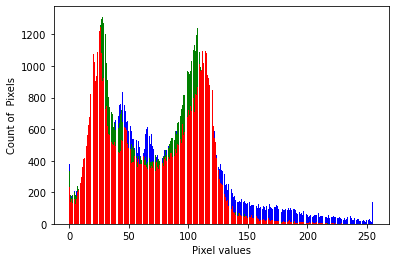

Frame Number 14


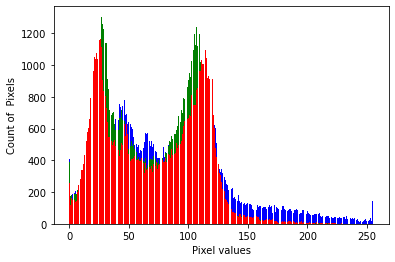

Frame Number 15


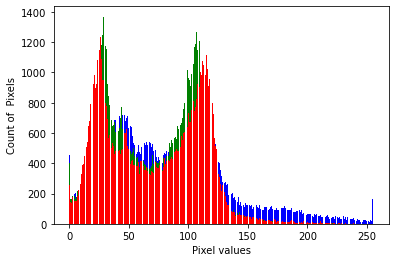

Frame Number 16


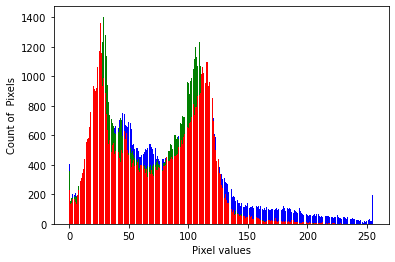

Frame Number 17


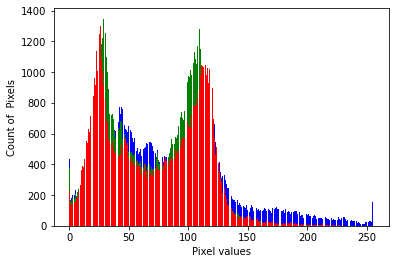

Frame Number 18


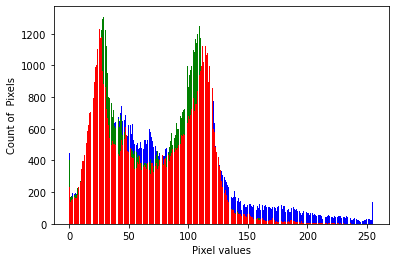

Frame Number 19


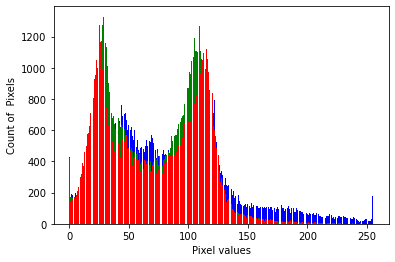

Frame Number 20


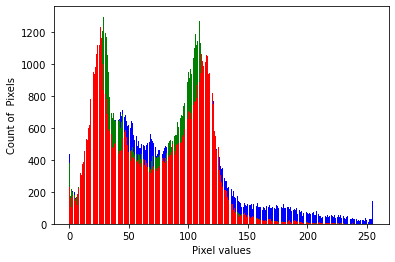

Frame Number 21


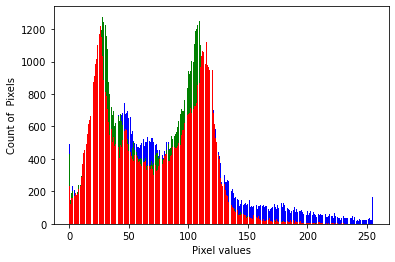

Frame Number 22


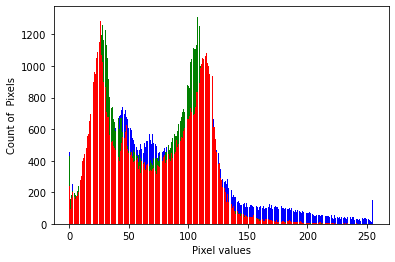

Frame Number 23


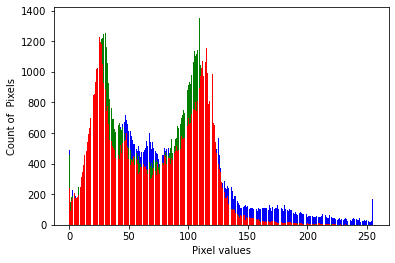

Frame Number 24


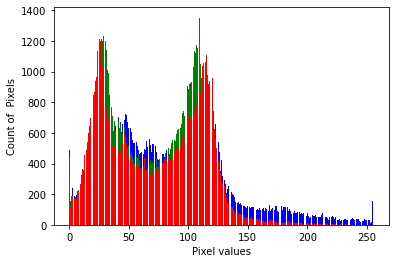

Frame Number 25


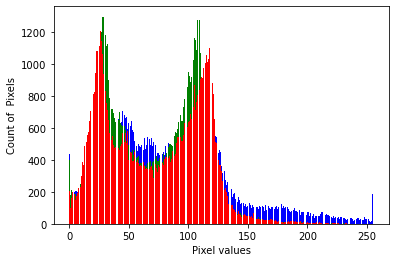

Frame Number 26


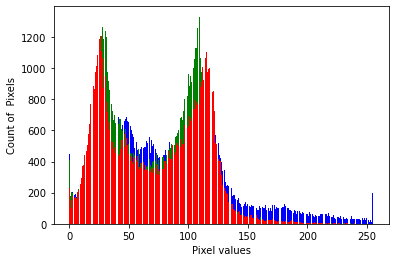

Frame Number 27


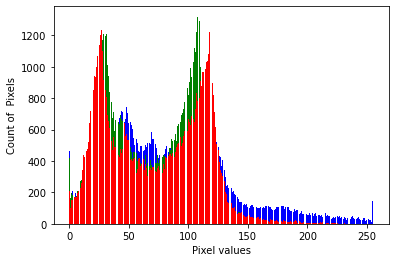

Frame Number 28


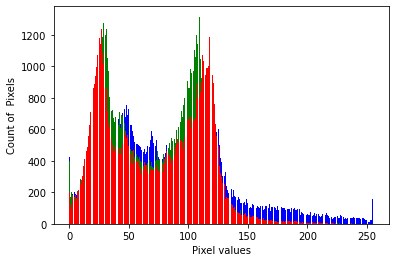

Frame Number 29


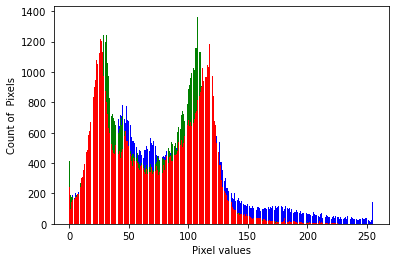

Frame Number 30


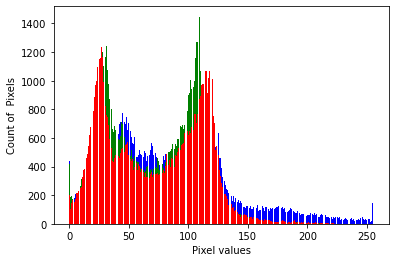

Frame Number 31


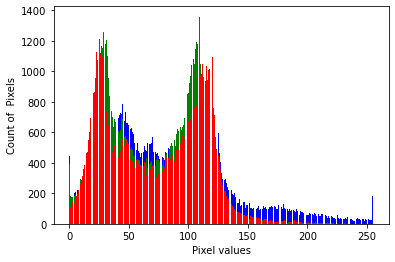

Frame Number 32


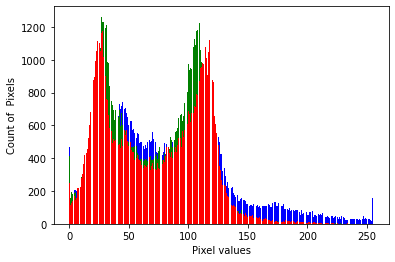

Frame Number 33


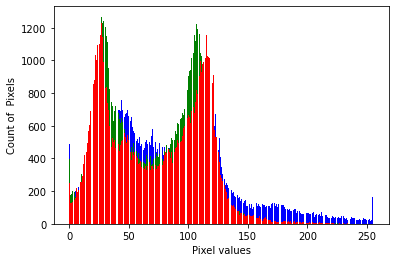

Frame Number 34


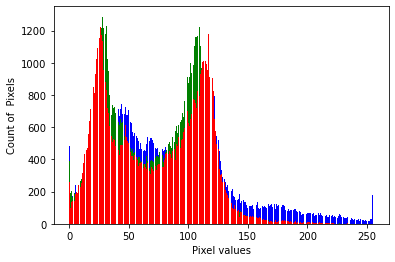

Frame Number 35


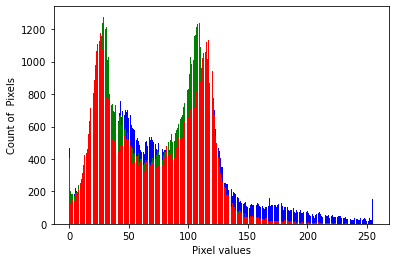

Frame Number 36


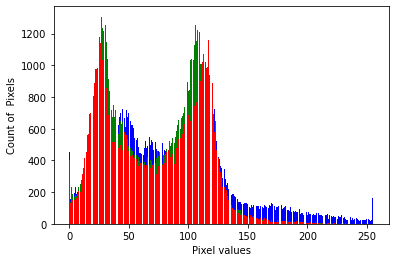

Frame Number 37


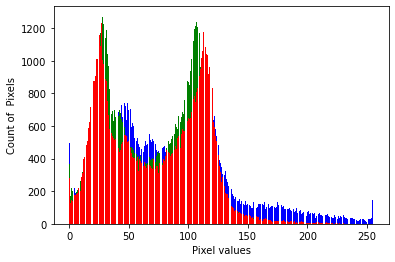

Frame Number 38


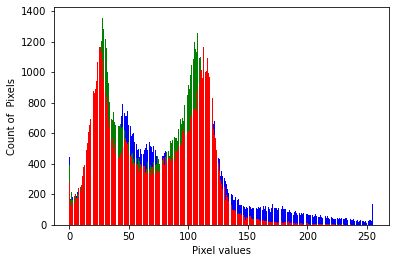

Frame Number 39


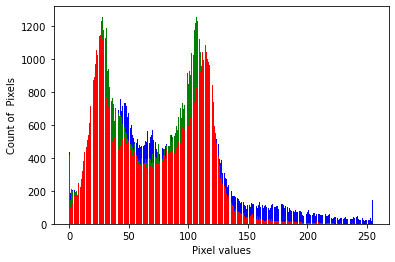

Frame Number 40


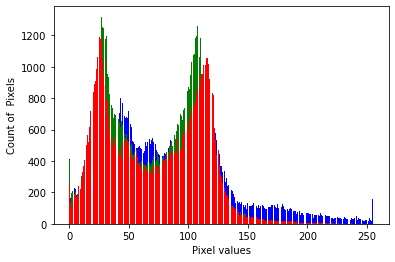

Frame Number 41


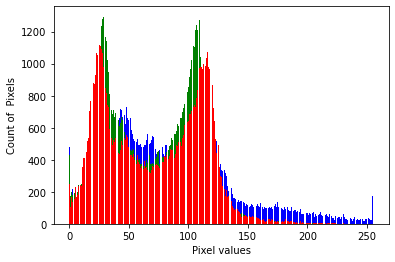

Frame Number 42


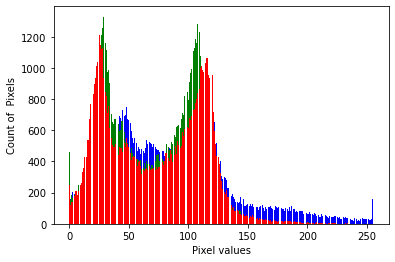

Frame Number 43


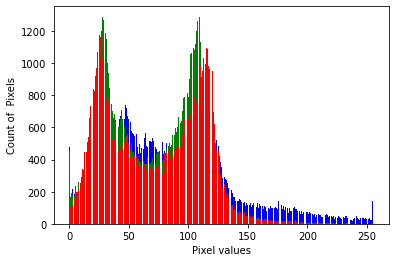

Frame Number 44


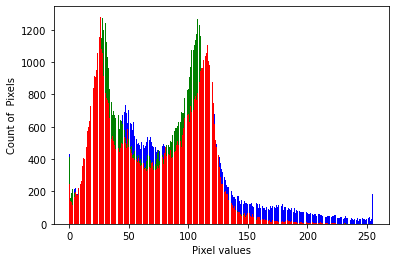

Frame Number 45


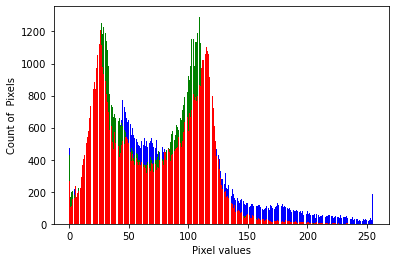

Frame Number 46


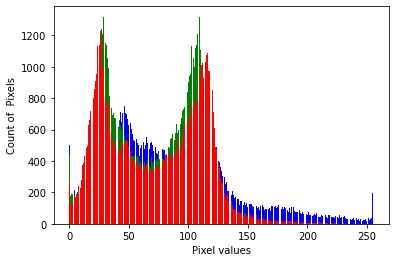

Frame Number 47


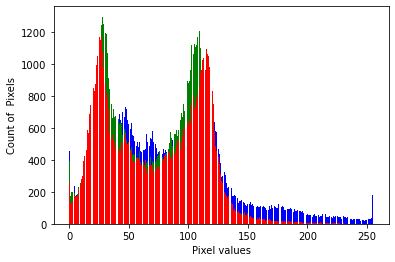

Frame Number 48


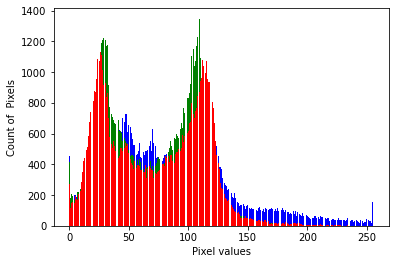

Frame Number 49


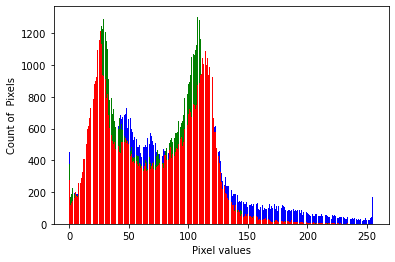

Frame Number 50


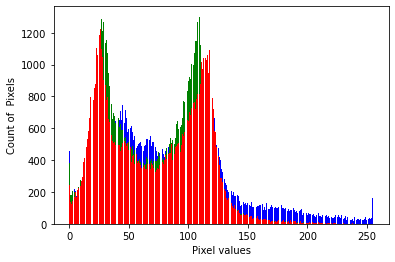

Frame Number 51


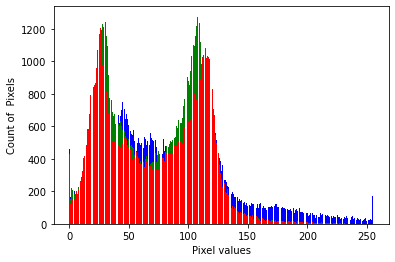

Frame Number 52


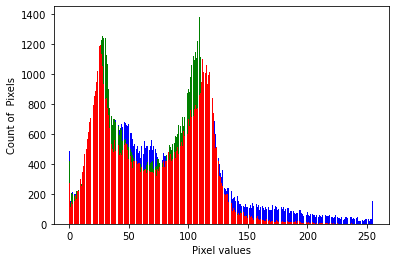

Frame Number 53


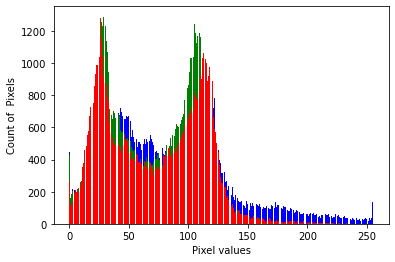

Frame Number 54


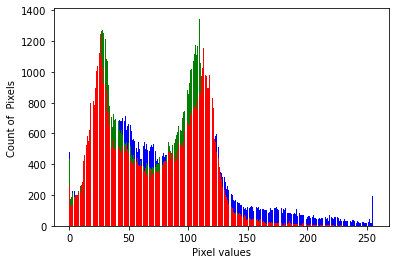

Frame Number 55


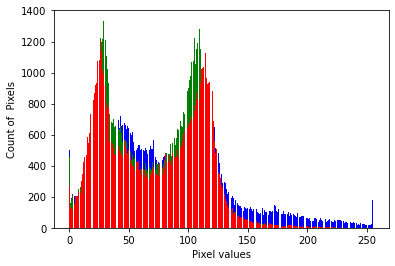

Frame Number 56


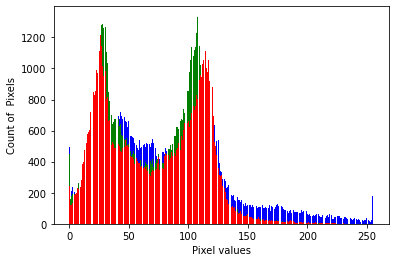

Frame Number 57


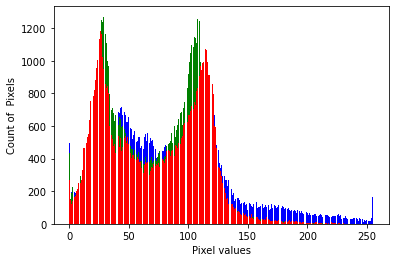

Frame Number 58


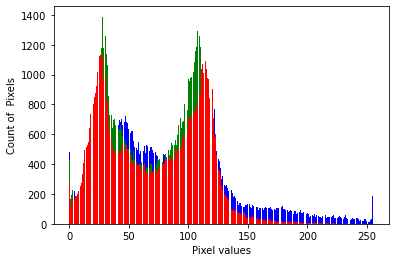

Frame Number 59


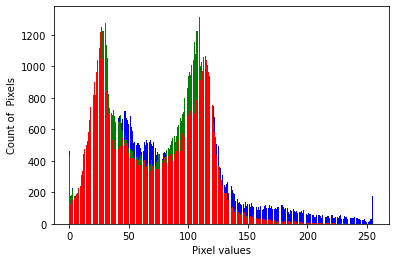

Frame Number 60


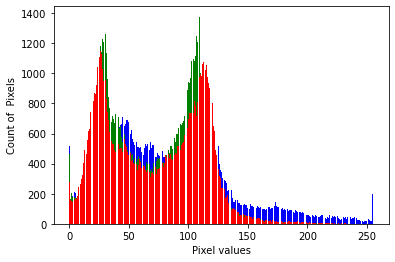

Frame Number 61


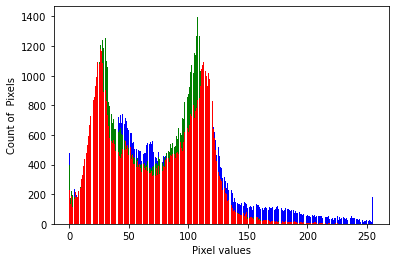

Frame Number 62


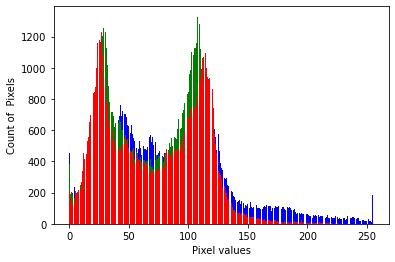

Frame Number 63


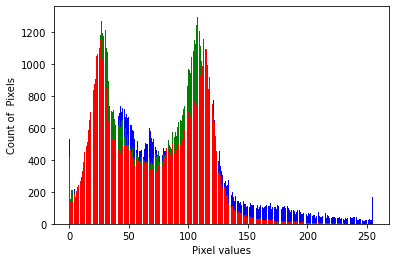

Frame Number 64


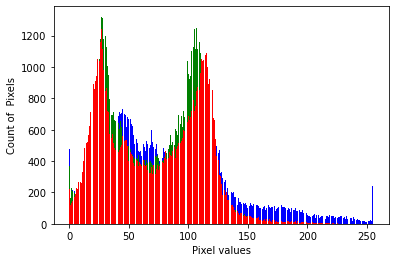

Frame Number 65


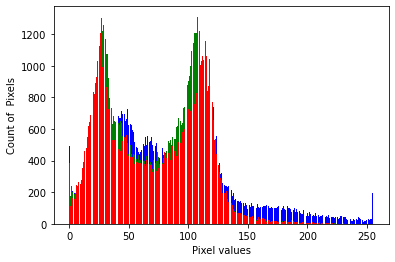

Frame Number 66


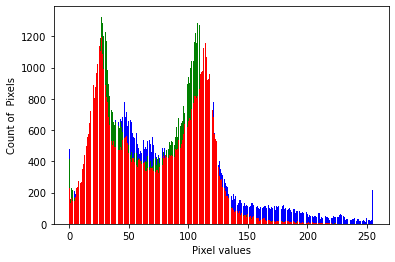

Frame Number 67


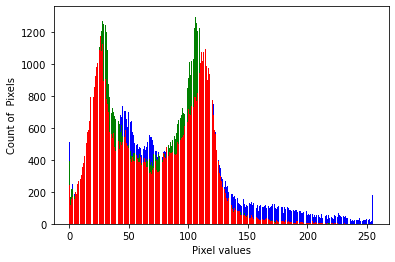

Frame Number 68


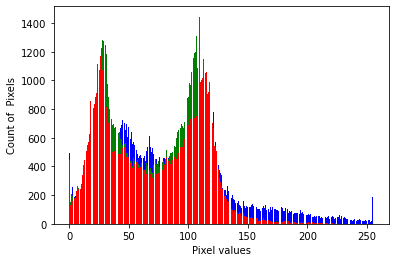

Frame Number 69


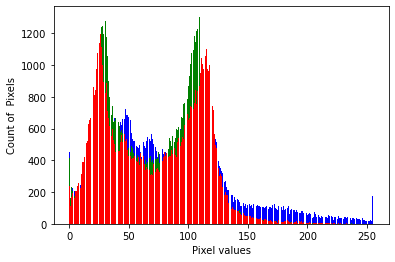

Frame Number 70


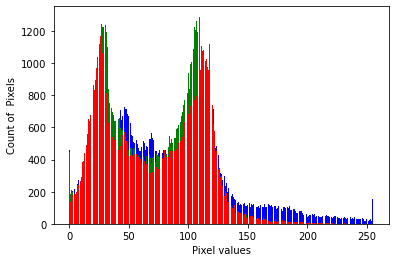

Frame Number 71


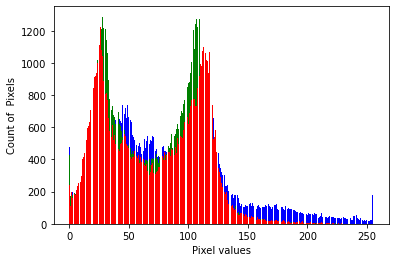

Frame Number 72


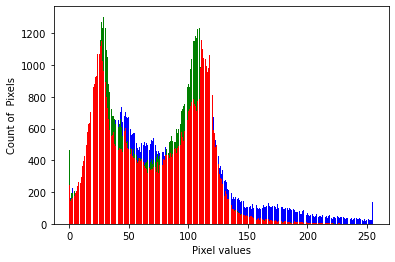

Frame Number 73


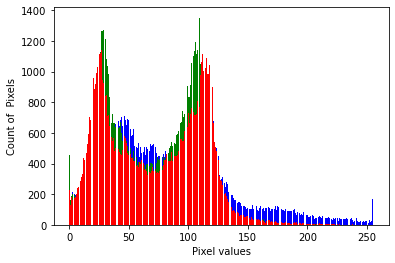

Frame Number 74


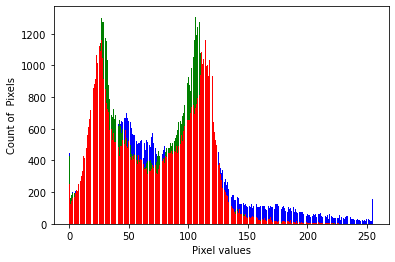

Frame Number 75


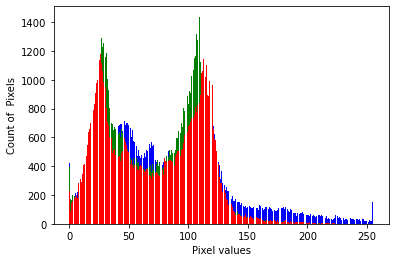

Frame Number 76


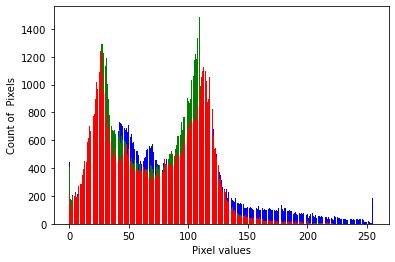

Frame Number 77


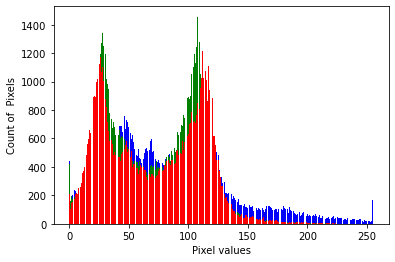

Frame Number 78


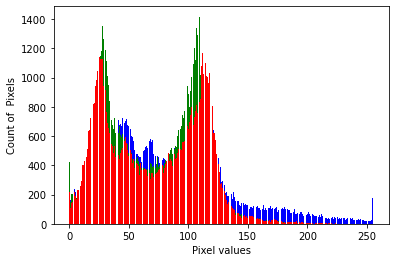

Frame Number 79


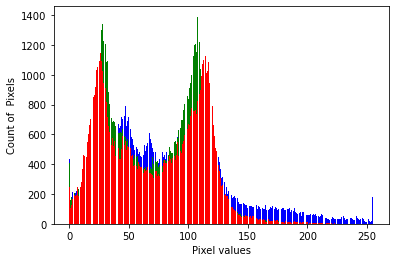

Frame Number 80


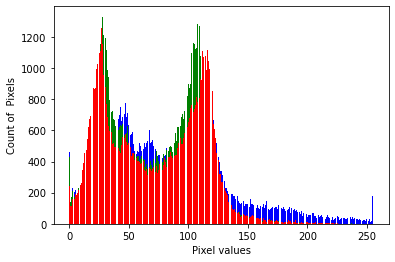

Frame Number 81


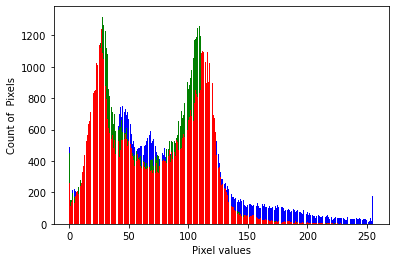

Frame Number 82


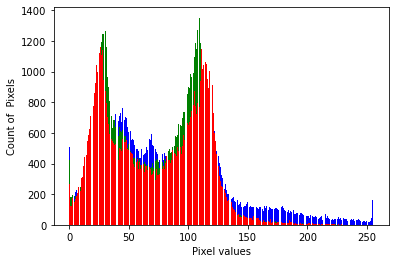

Frame Number 83


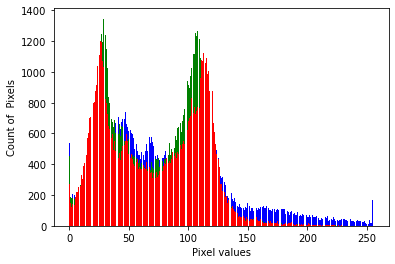

Frame Number 84


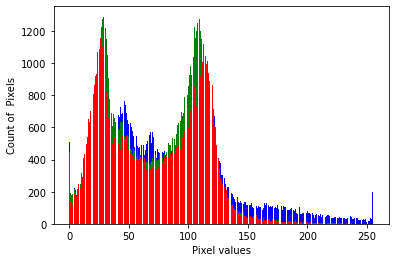

Frame Number 85


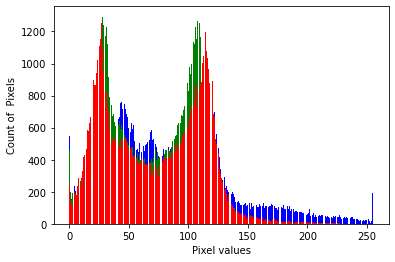

Frame Number 86


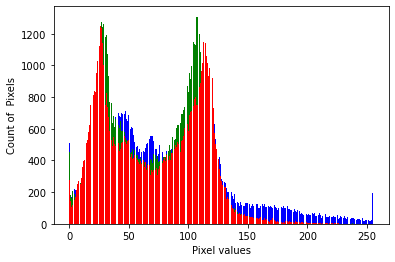

Frame Number 87


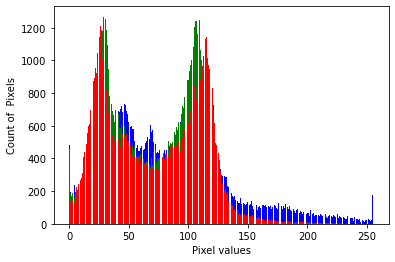

Frame Number 88


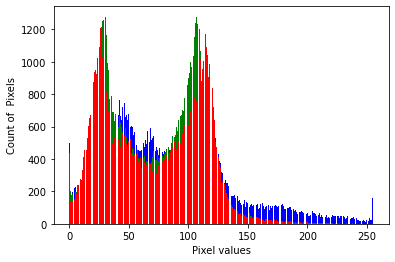

Frame Number 89


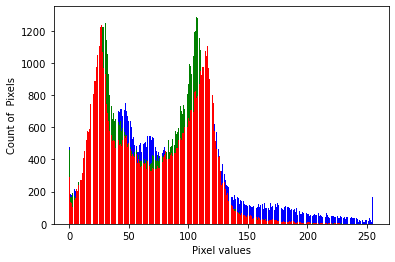

Frame Number 90


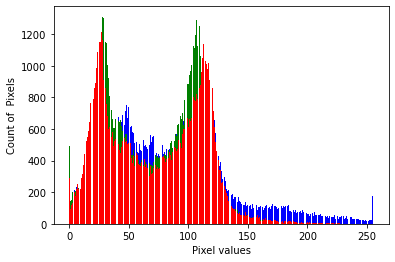

Frame Number 91


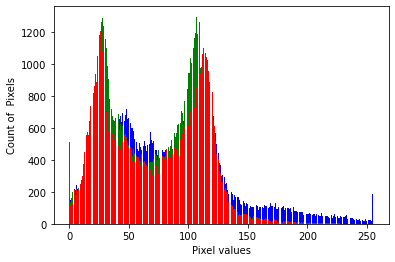

Frame Number 92


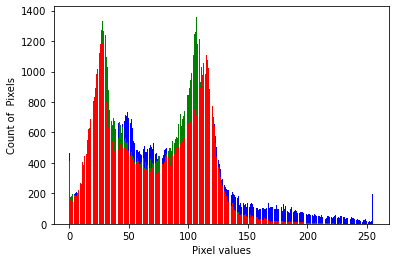

Frame Number 93


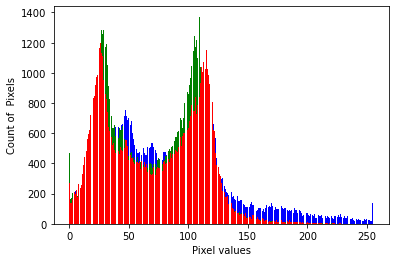

Frame Number 94


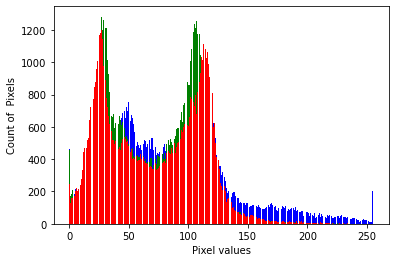

Frame Number 95


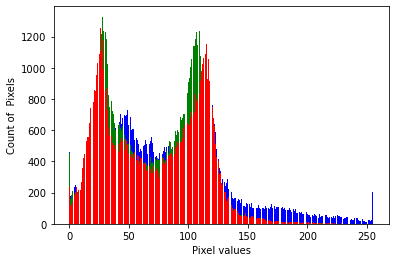

Frame Number 96


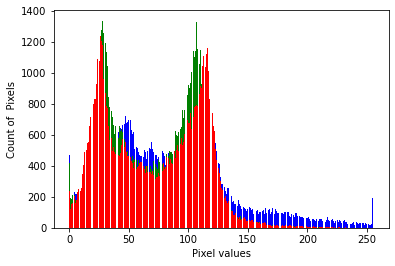

Frame Number 97


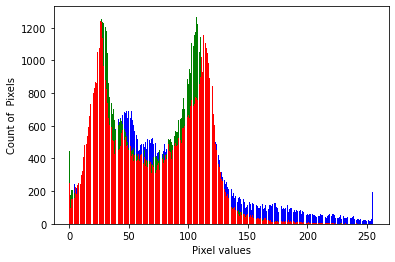

Frame Number 98


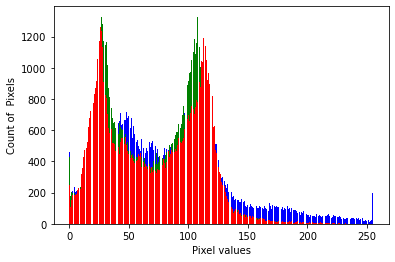

Frame Number 99


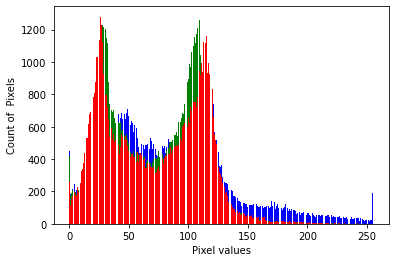

Frame Number 100


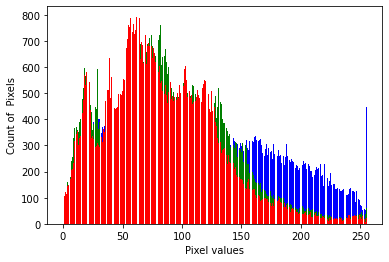

Frame Number 101


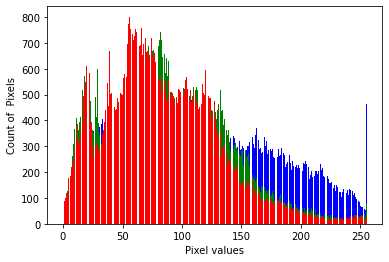

Frame Number 102


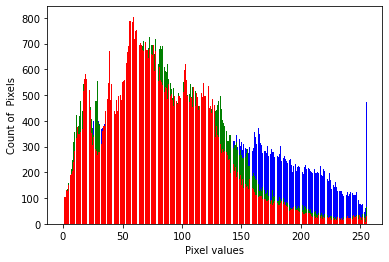

Frame Number 103


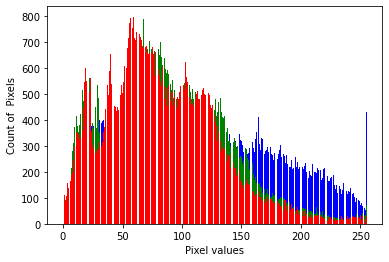

Frame Number 104


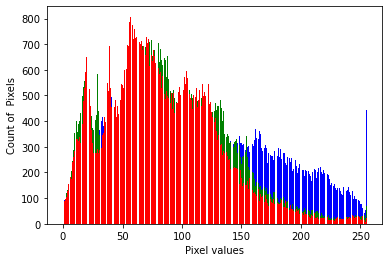

Frame Number 105


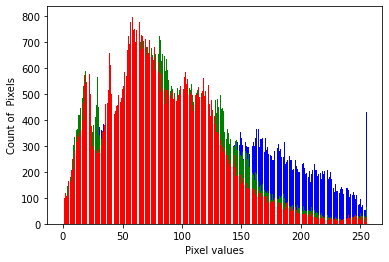

Frame Number 106


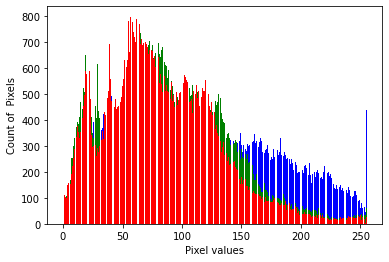

Frame Number 107


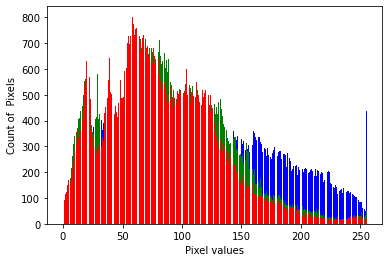

Frame Number 108


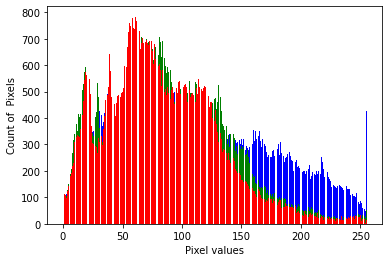

Frame Number 109


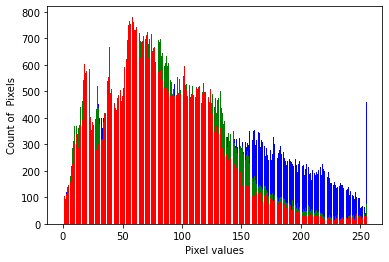

Frame Number 110


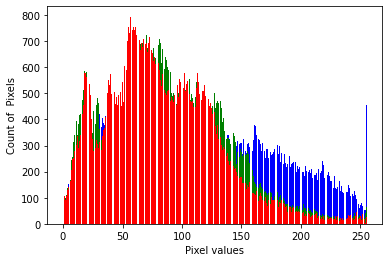

Frame Number 111


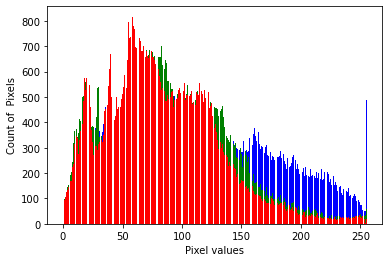

Frame Number 112


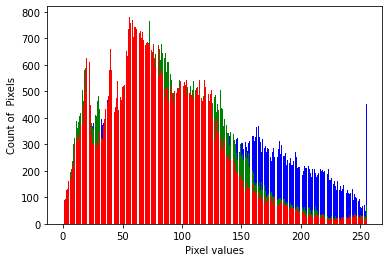

Frame Number 113


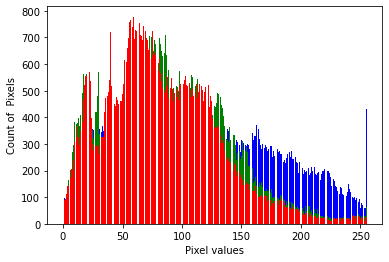

Frame Number 114


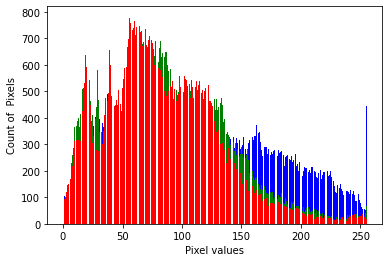

Frame Number 115


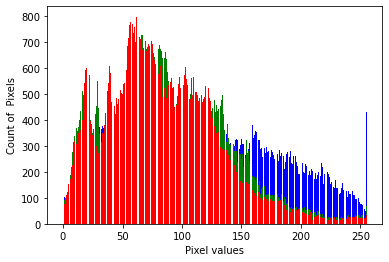

Frame Number 116


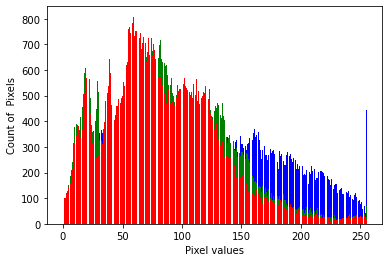

Frame Number 117


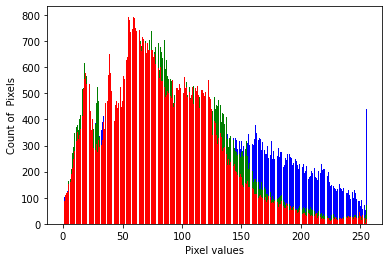

Frame Number 118


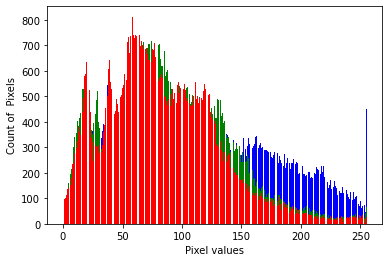

Frame Number 119


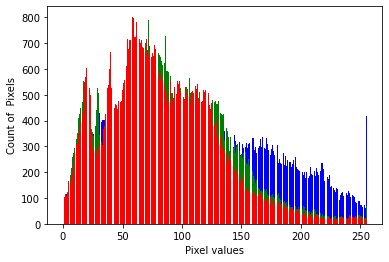

Frame Number 120


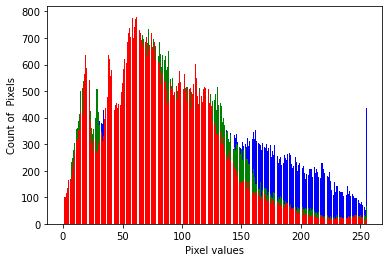

Frame Number 121


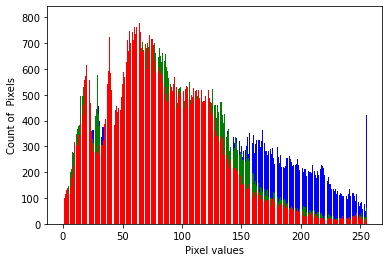

Frame Number 122


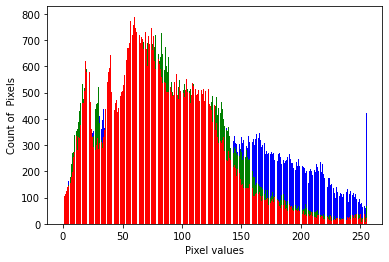

Frame Number 123


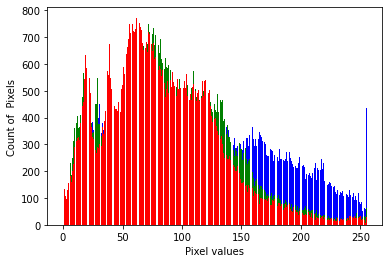

Frame Number 124


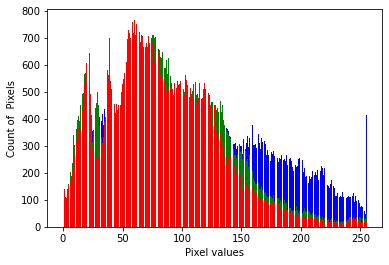

Frame Number 125


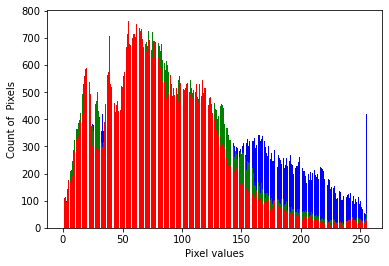

Frame Number 126


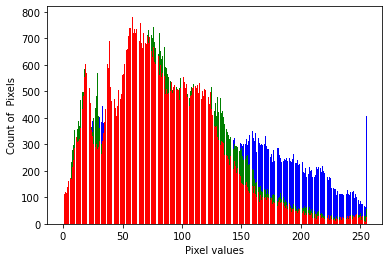

Frame Number 127


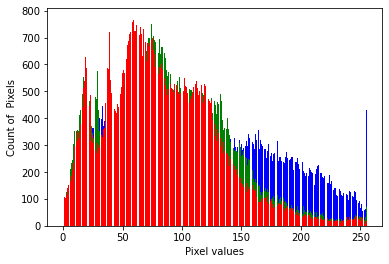

Frame Number 128


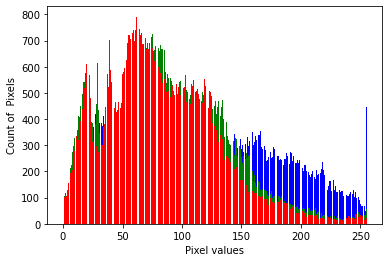

Frame Number 129


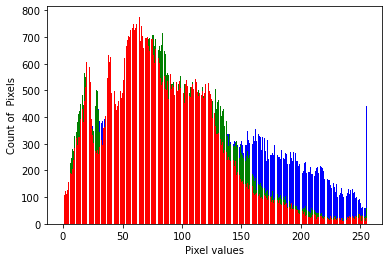

Frame Number 130


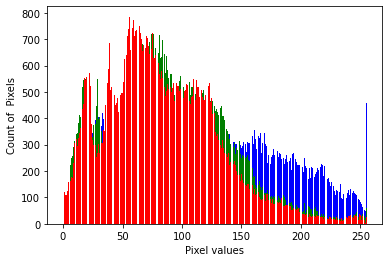

Frame Number 131


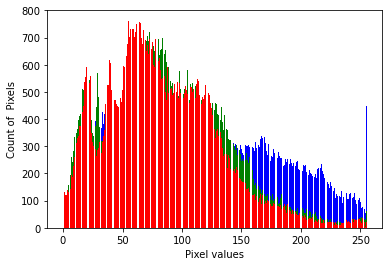

Frame Number 132


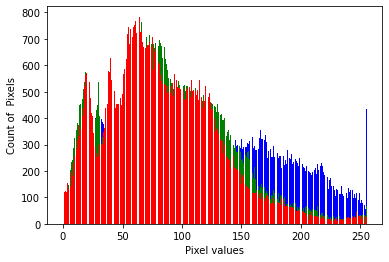

Frame Number 133


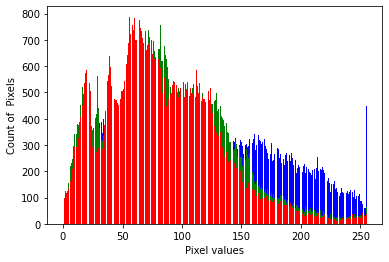

Frame Number 134


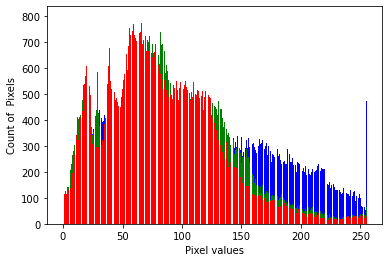

Frame Number 135


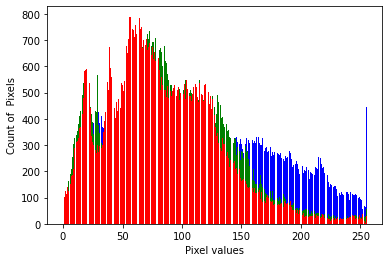

Frame Number 136


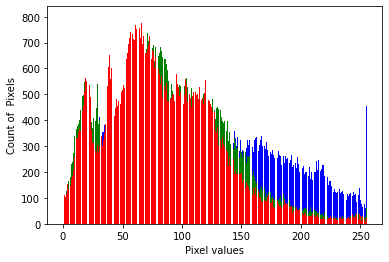

Frame Number 137


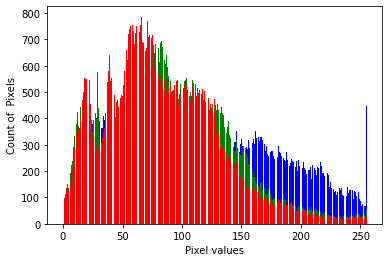

Frame Number 138


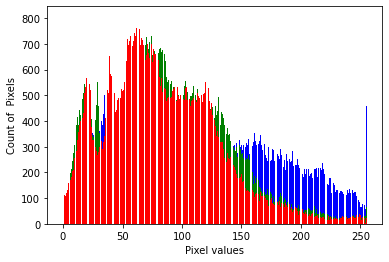

Frame Number 139


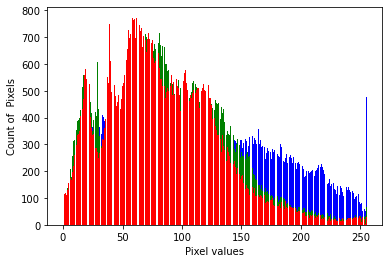

Frame Number 140


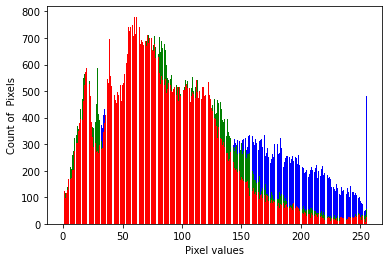

Frame Number 141


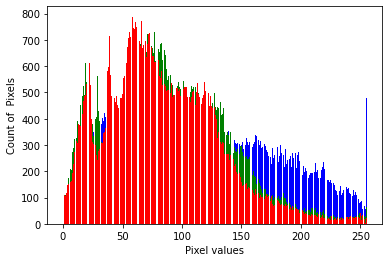

Frame Number 142


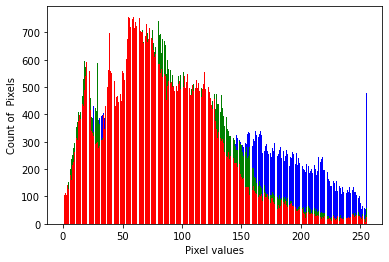

Frame Number 143


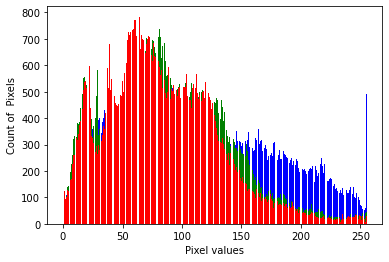

Frame Number 144


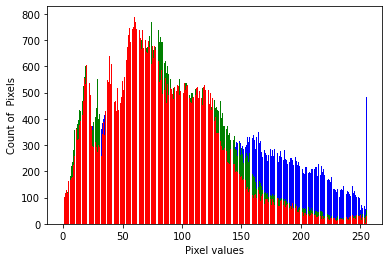

Frame Number 145


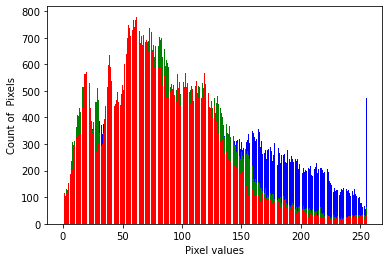

Frame Number 146


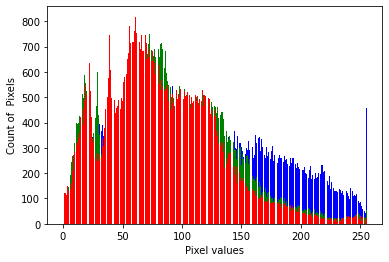

Frame Number 147


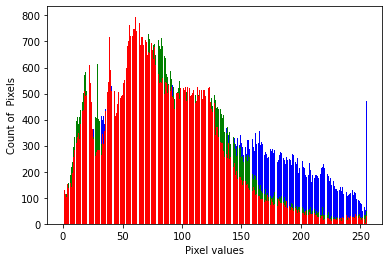

Frame Number 148


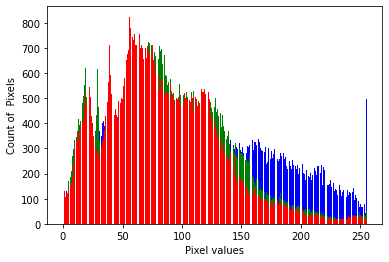

Frame Number 149


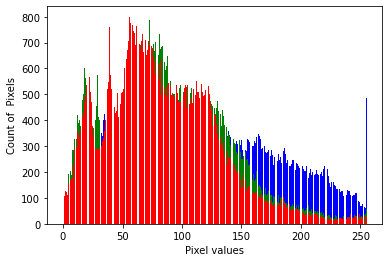

Frame Number 150


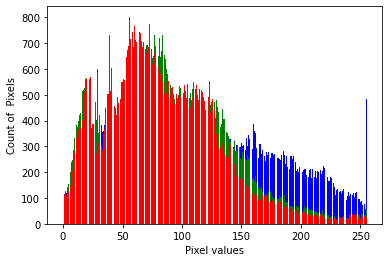

Frame Number 151


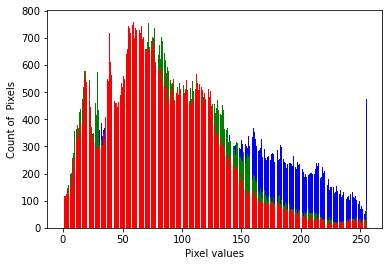

Frame Number 152


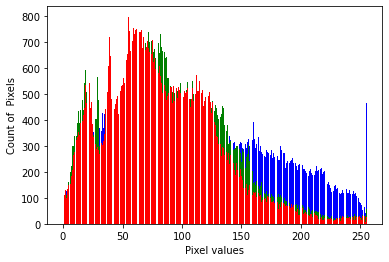

Frame Number 153


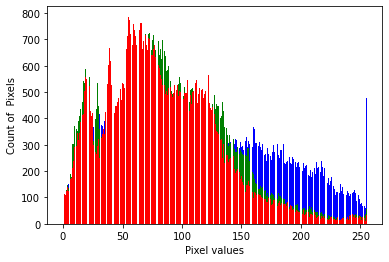

Frame Number 154


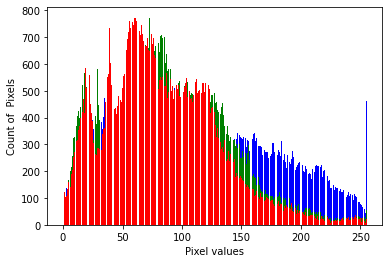

Frame Number 155


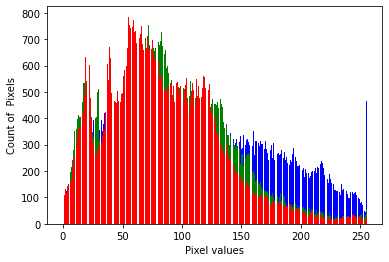

Frame Number 156


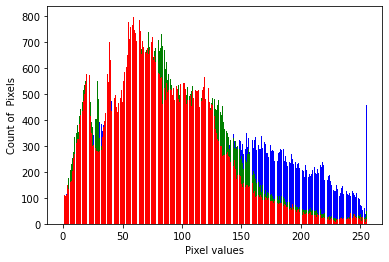

Frame Number 157


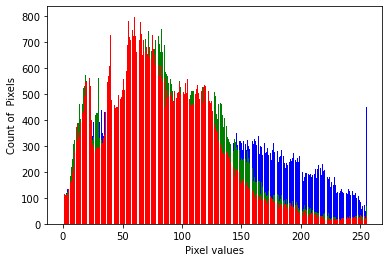

Frame Number 158


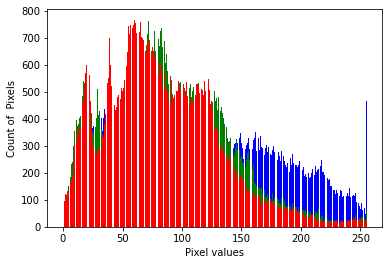

Frame Number 159


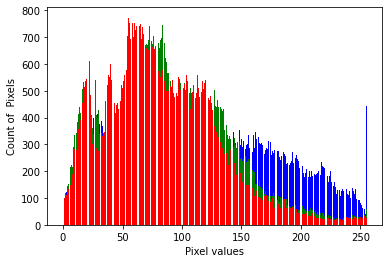

Frame Number 160


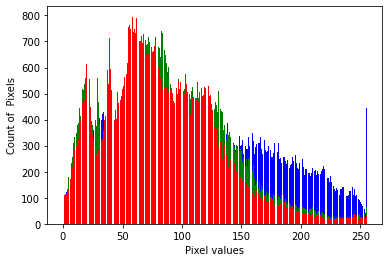

Frame Number 161


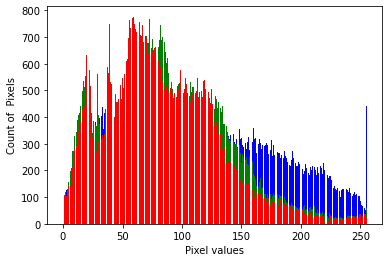

Frame Number 162


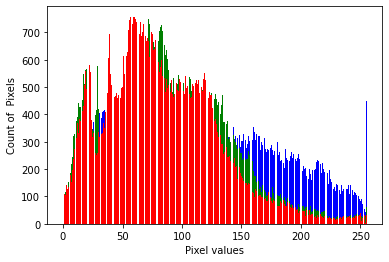

Frame Number 163


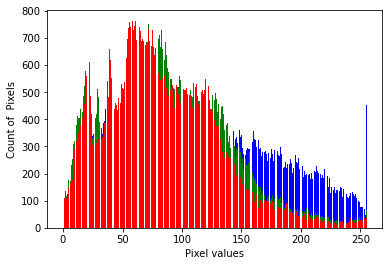

Frame Number 164


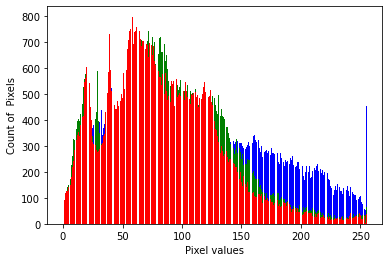

Frame Number 165


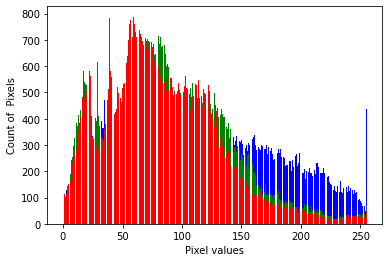

Frame Number 166


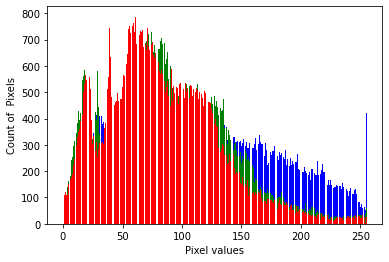

Frame Number 167


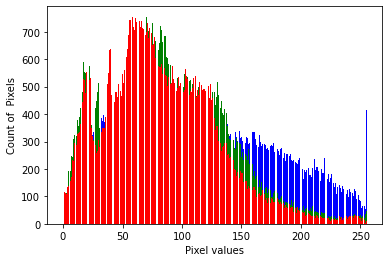

Frame Number 168


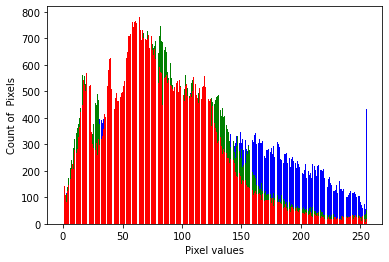

Frame Number 169


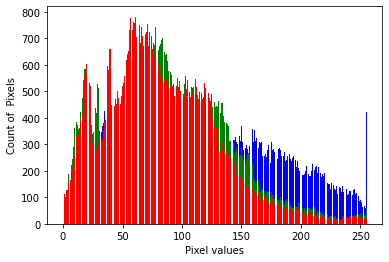

Frame Number 170


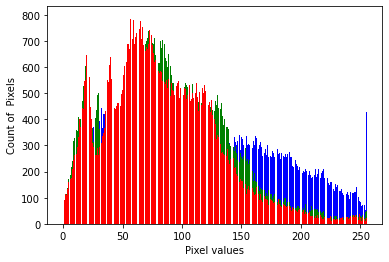

Frame Number 171


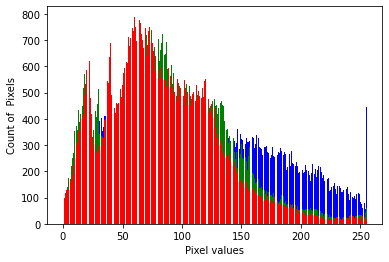

Frame Number 172


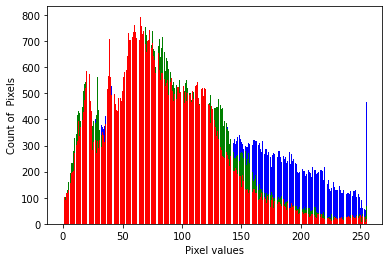

Frame Number 173


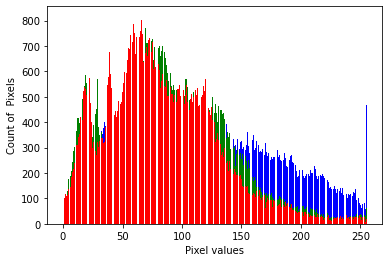

Frame Number 174


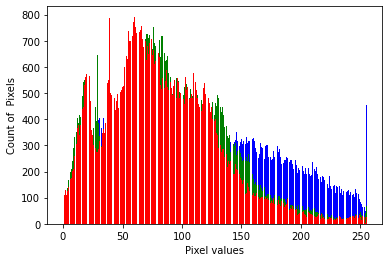

Frame Number 175


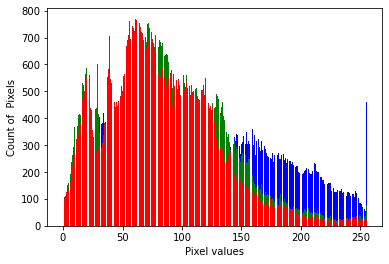

Frame Number 176


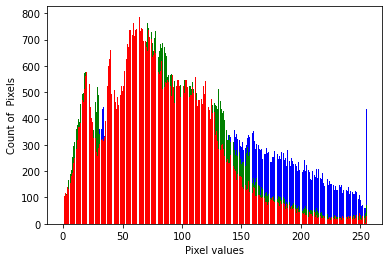

Frame Number 177


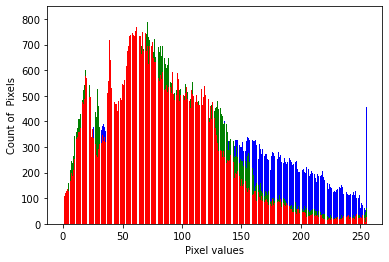

Frame Number 178


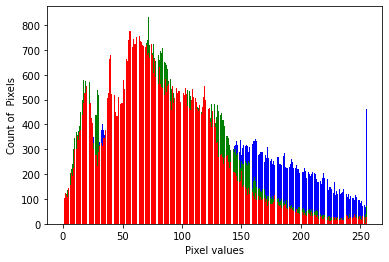

Frame Number 179


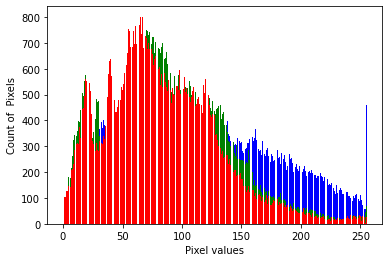

Frame Number 180


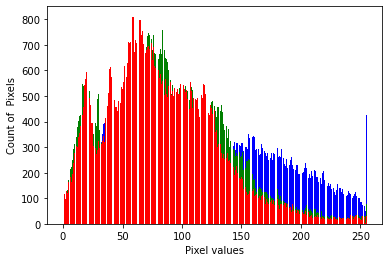

Frame Number 181


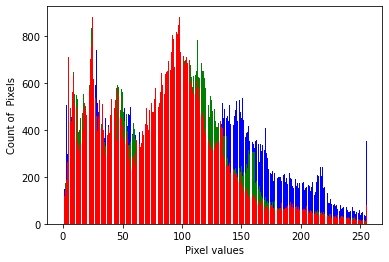

Frame Number 182


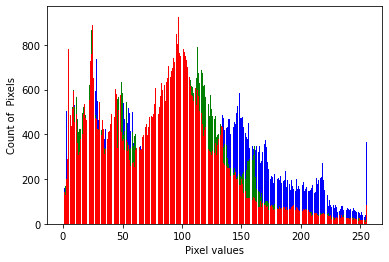

Frame Number 183


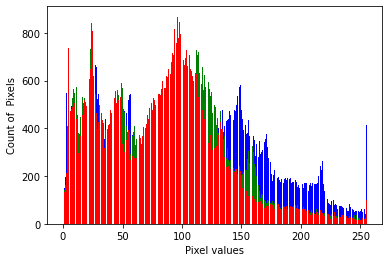

Frame Number 184


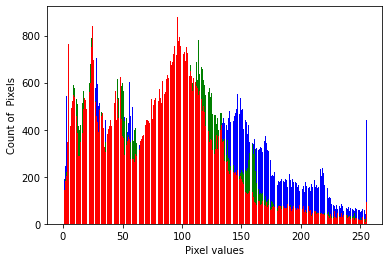

Frame Number 185


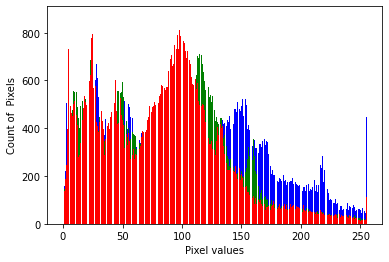

Frame Number 186


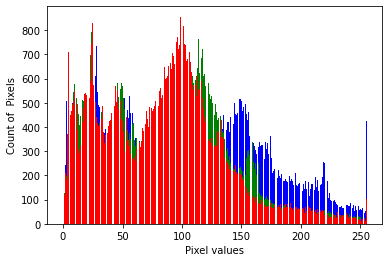

Frame Number 187


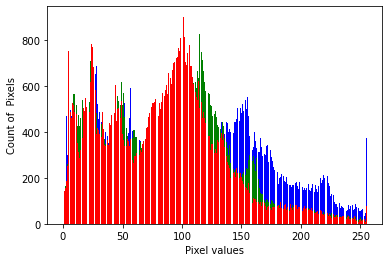

Frame Number 188


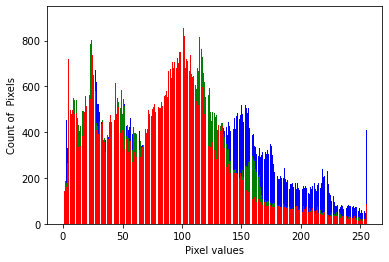

Frame Number 189


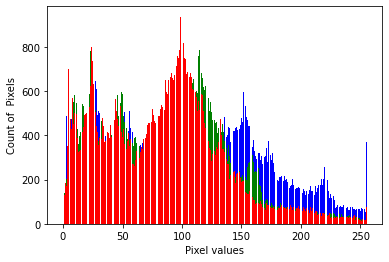

Frame Number 190


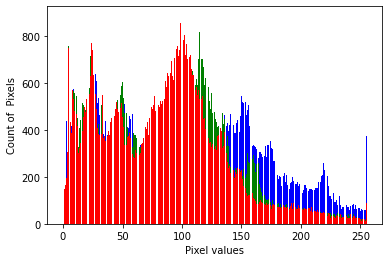

Frame Number 191


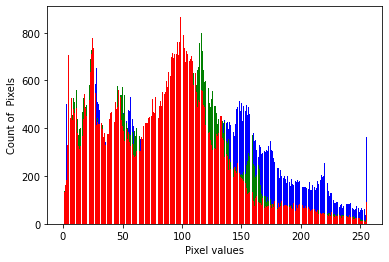

Frame Number 192


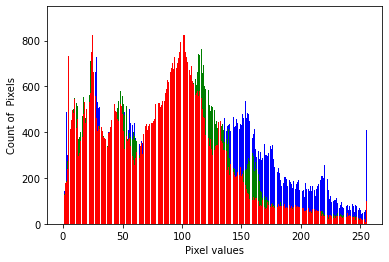

Frame Number 193


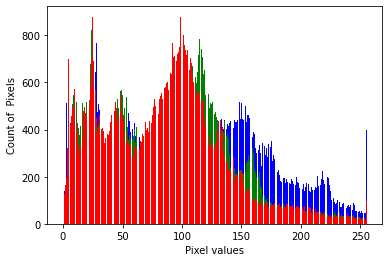

Frame Number 194


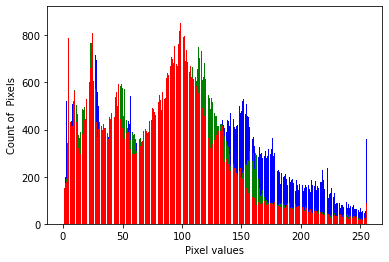

Frame Number 195


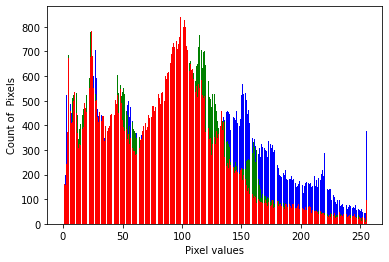

Frame Number 196


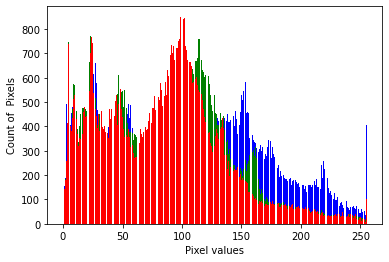

Frame Number 197


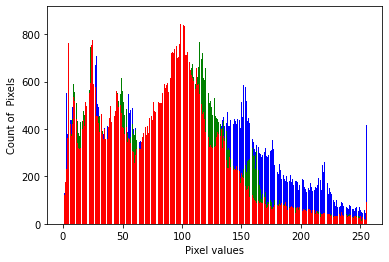

Frame Number 198


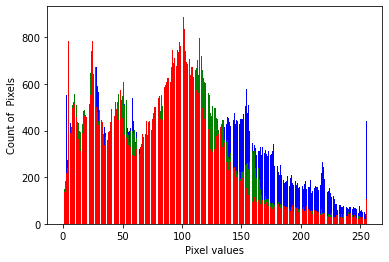

Frame Number 199


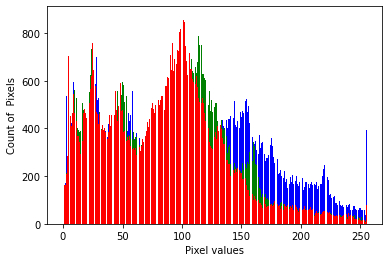

Frame Number 200


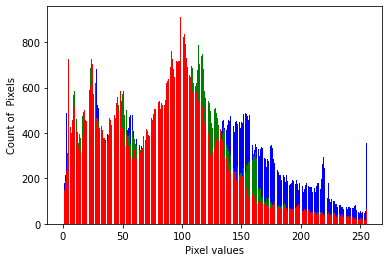

Frame Number 201


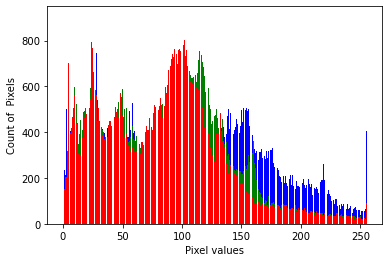

Frame Number 202


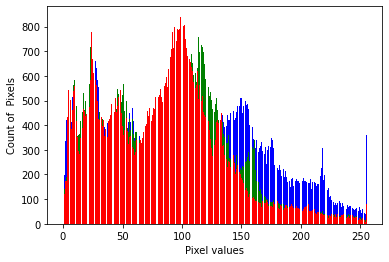

Frame Number 203


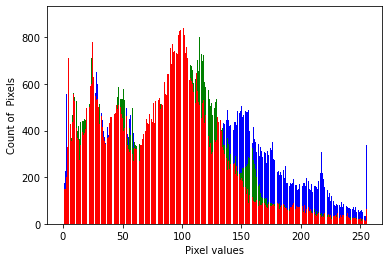

Frame Number 204


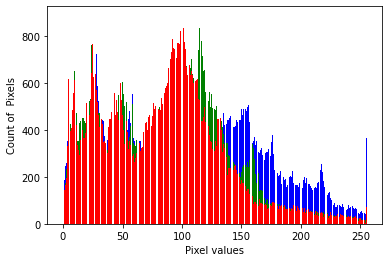

Frame Number 205


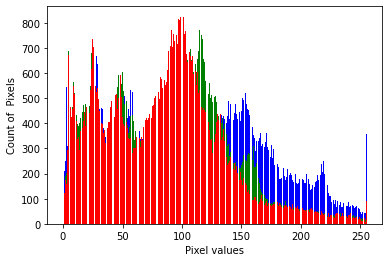

Frame Number 206


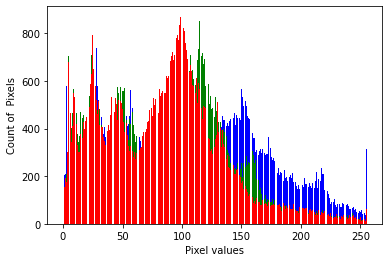

Frame Number 207


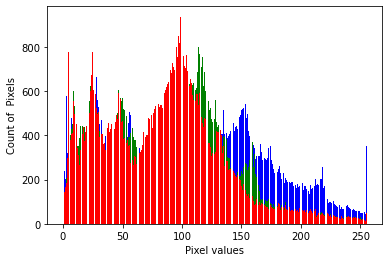

Frame Number 208


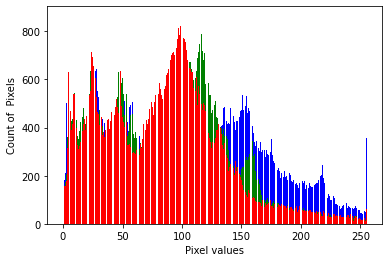

Frame Number 209


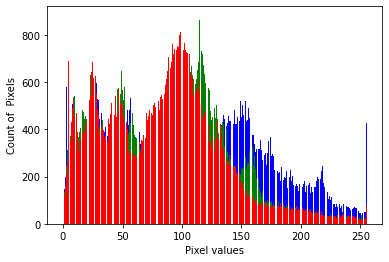

Frame Number 210


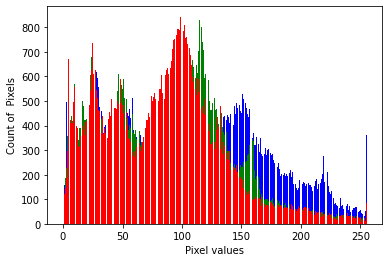

Frame Number 211


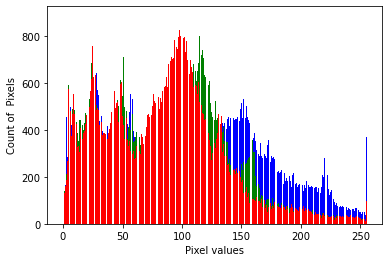

Frame Number 212


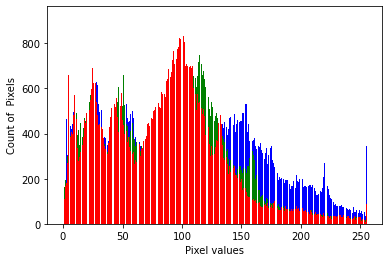

Frame Number 213


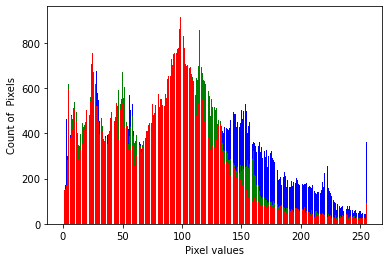

Frame Number 214


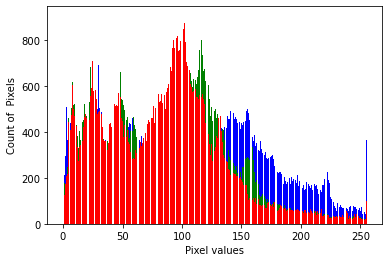

Frame Number 215


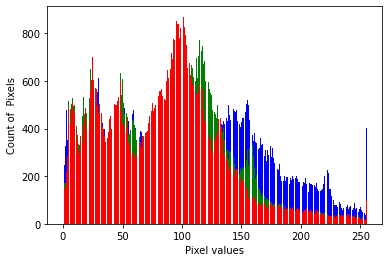

Frame Number 216


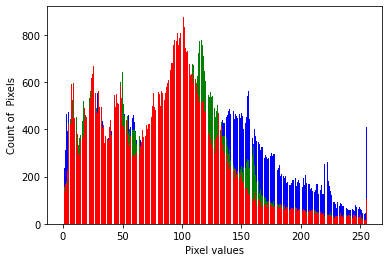

Frame Number 217


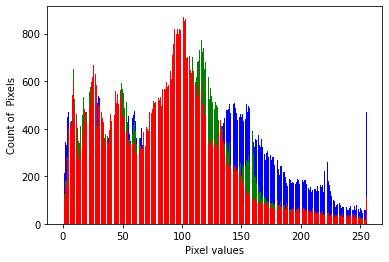

Frame Number 218


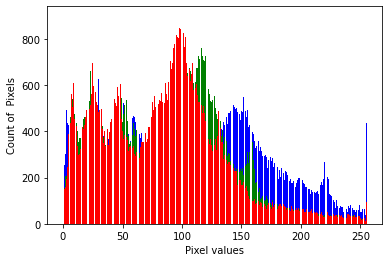

Frame Number 219


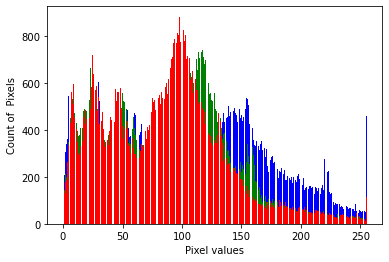

Frame Number 220


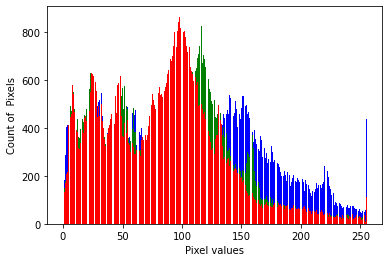

Frame Number 221


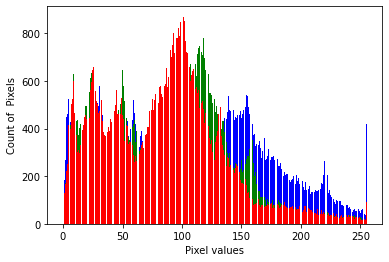

Frame Number 222


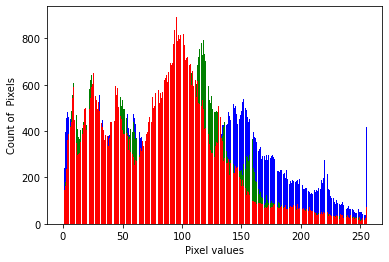

Frame Number 223


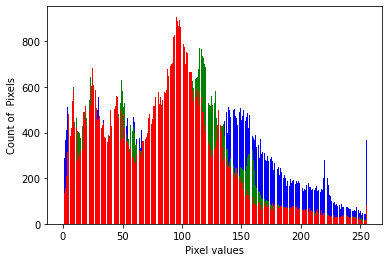

Frame Number 224


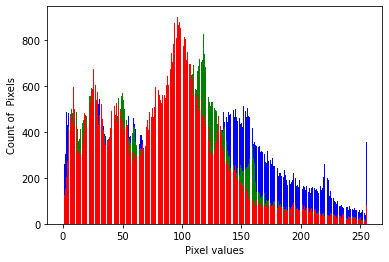

Frame Number 225


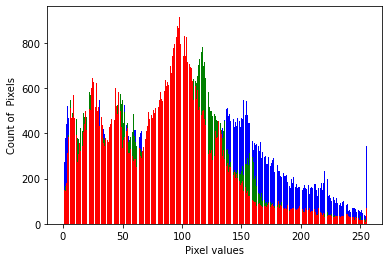

Frame Number 226


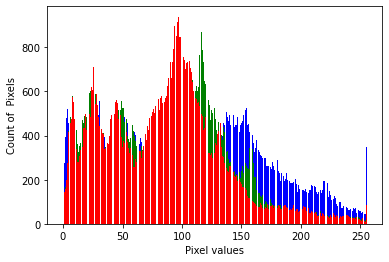

Frame Number 227


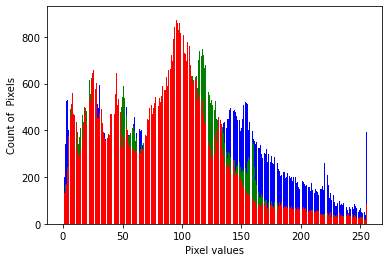

Frame Number 228


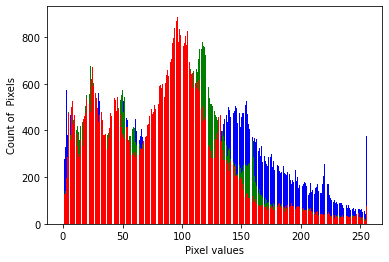

Frame Number 229


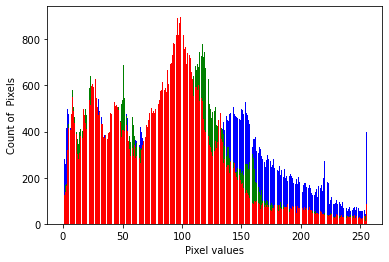

Frame Number 230


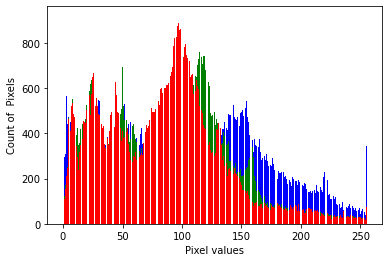

Frame Number 231


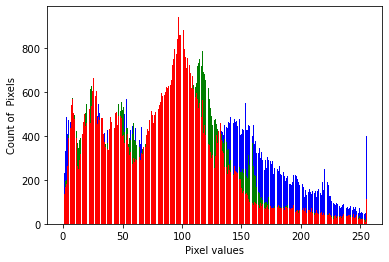

Frame Number 232


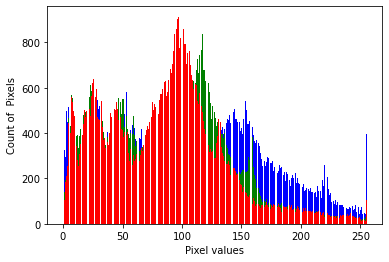

Frame Number 233


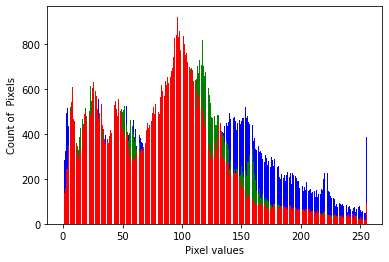

Frame Number 234


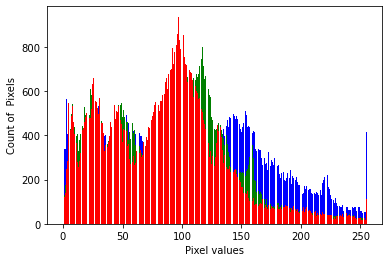

Frame Number 235


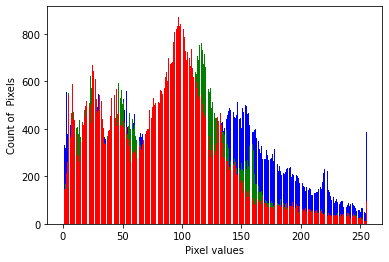

Frame Number 236


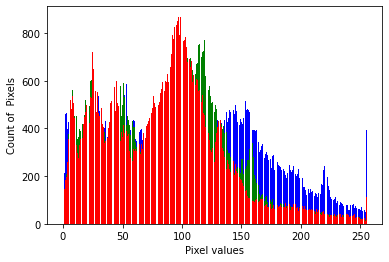

Frame Number 237


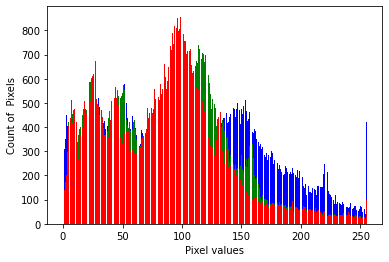

Frame Number 238


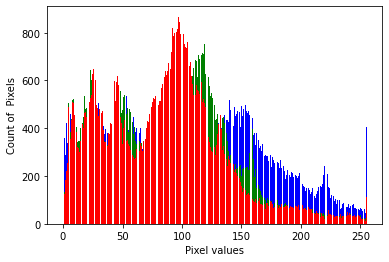

Frame Number 239


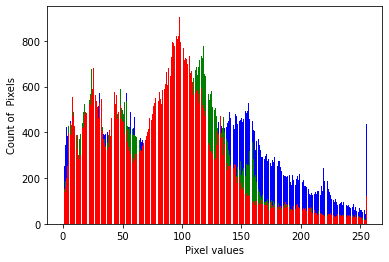

Frame Number 240


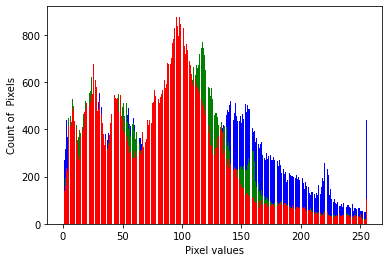

Frame Number 241


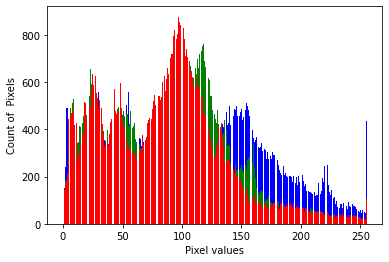

Frame Number 242


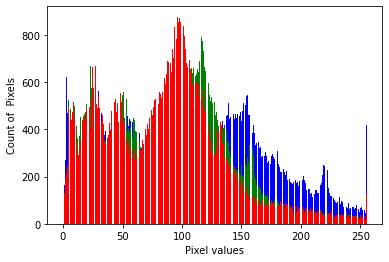

Frame Number 243


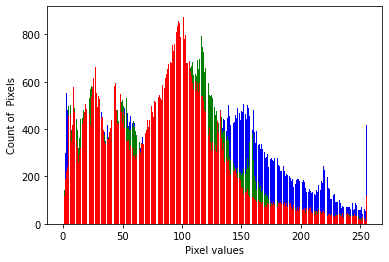

Frame Number 244


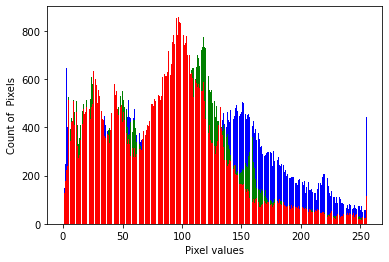

Frame Number 245


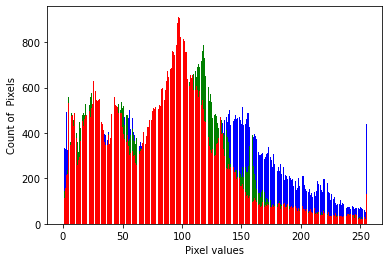

Frame Number 246


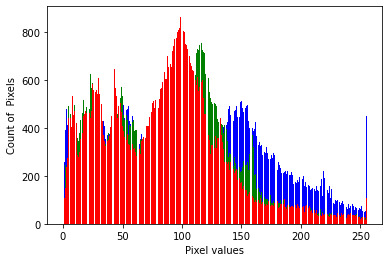

Frame Number 247


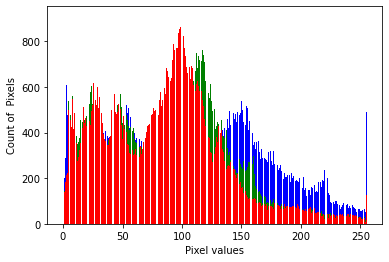

Frame Number 248


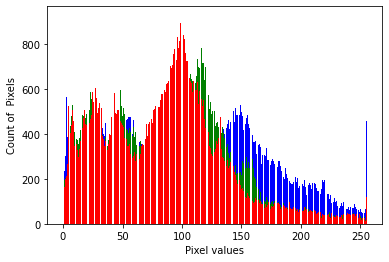

Frame Number 249


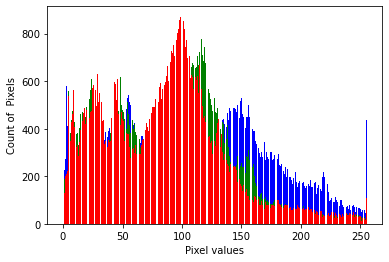

Frame Number 250


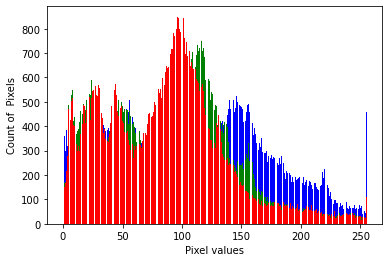

Frame Number 251


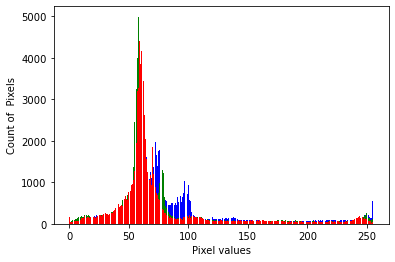

Frame Number 252


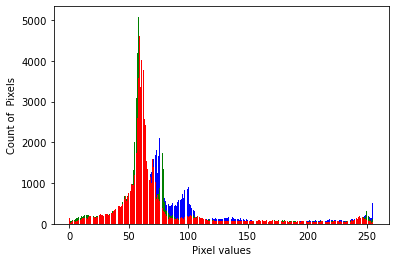

Frame Number 253


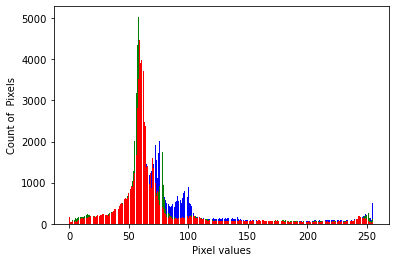

Frame Number 254


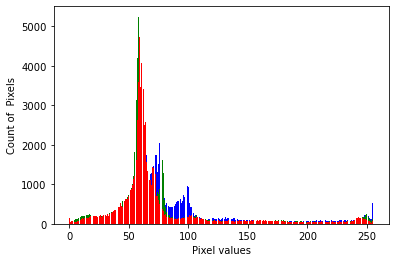

Frame Number 255


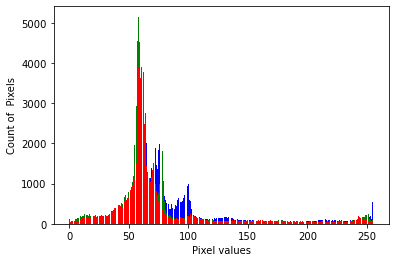

Frame Number 256


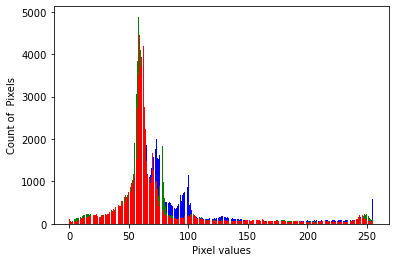

Frame Number 257


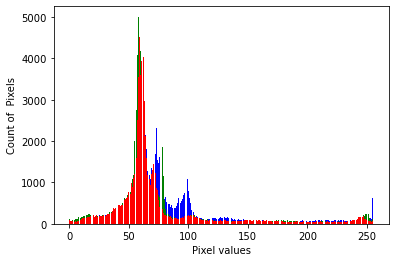

Frame Number 258


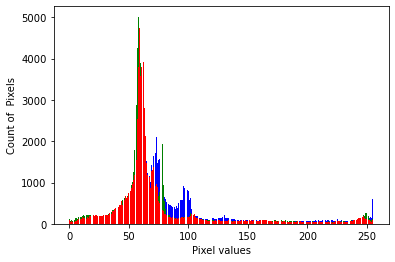

Frame Number 259


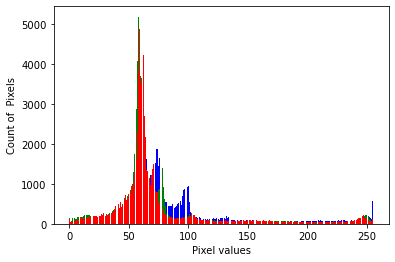

Frame Number 260


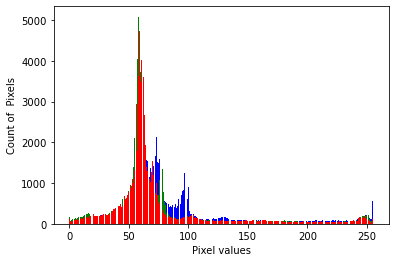

Frame Number 261


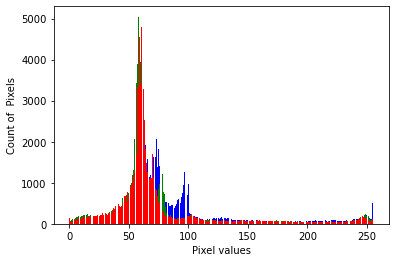

Frame Number 262


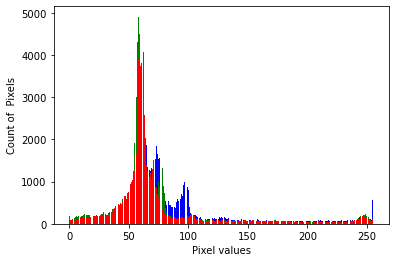

Frame Number 263


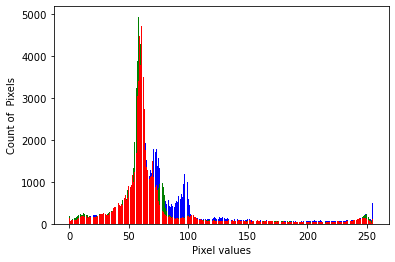

Frame Number 264


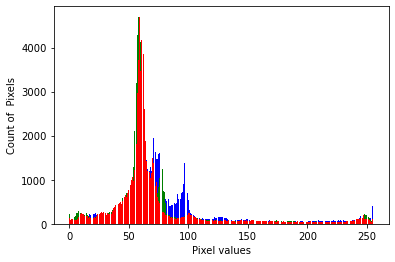

Frame Number 265


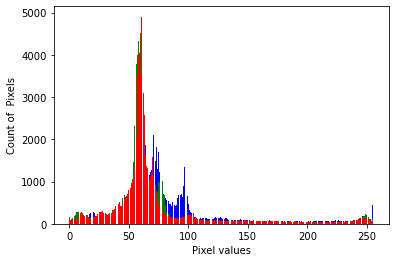

Frame Number 266


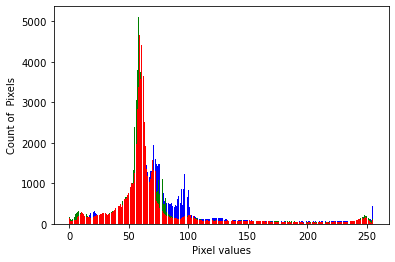

Frame Number 267


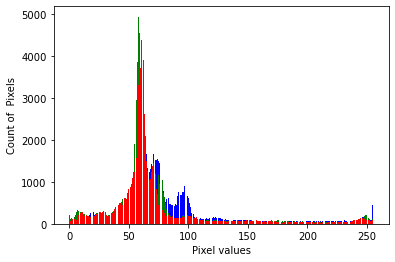

Frame Number 268


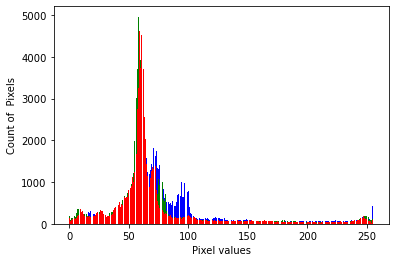

Frame Number 269


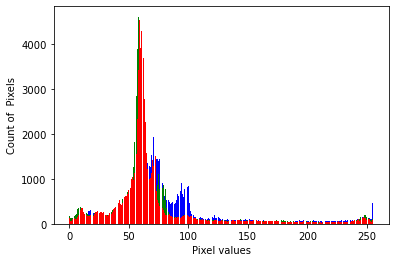

Frame Number 270


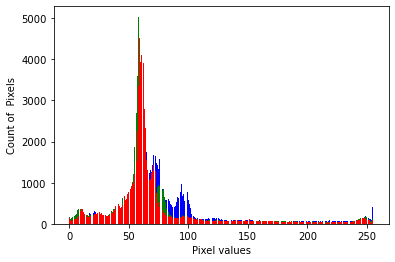

Frame Number 271


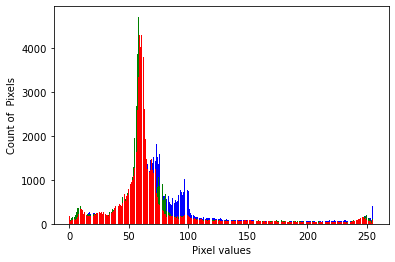

Frame Number 272


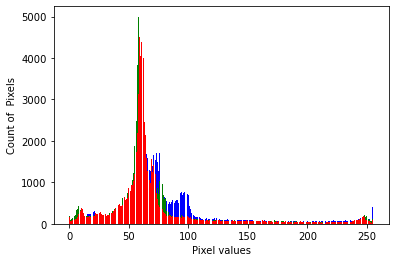

Frame Number 273


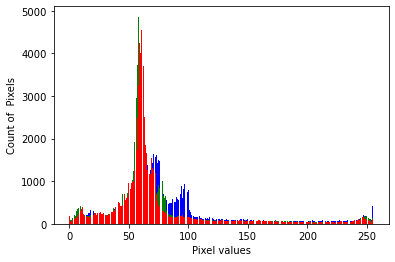

Frame Number 274


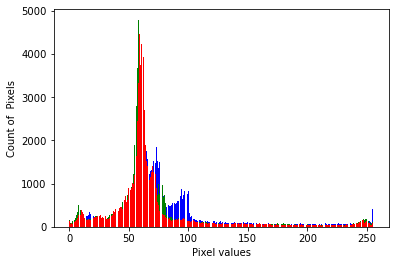

Frame Number 275


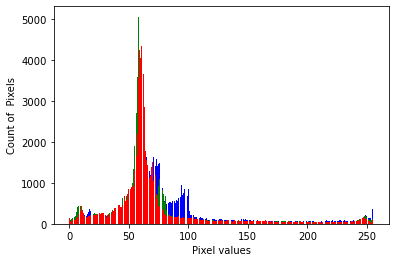

Frame Number 276


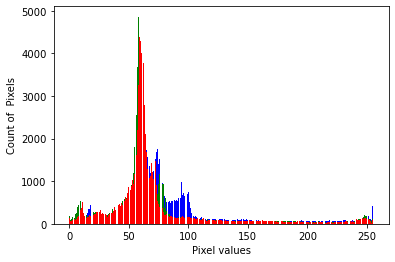

Frame Number 277


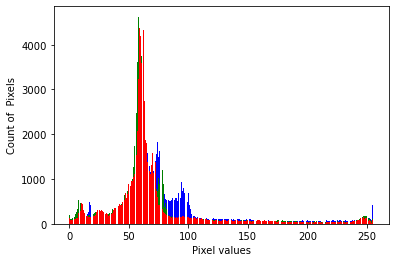

Frame Number 278


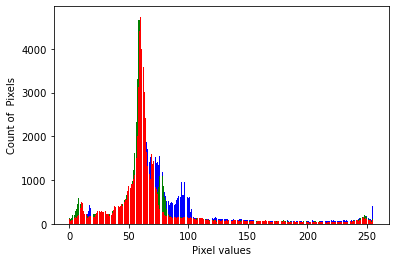

Frame Number 279


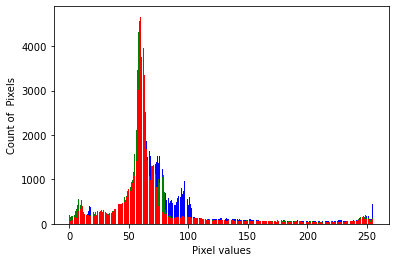

Frame Number 280


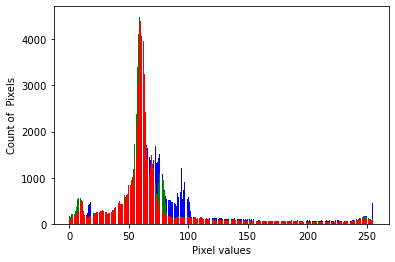

Frame Number 281


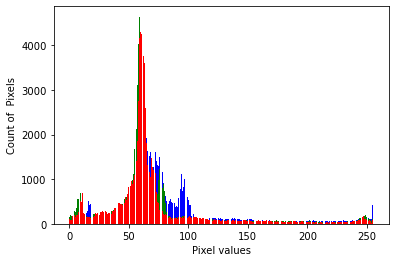

Frame Number 282


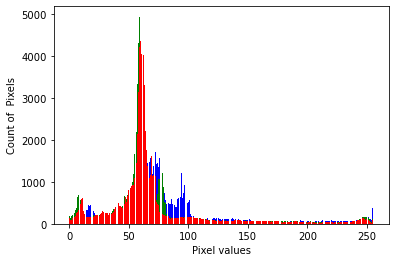

Frame Number 283


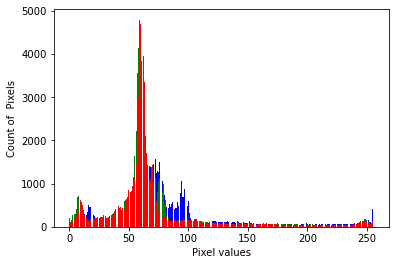

Frame Number 284


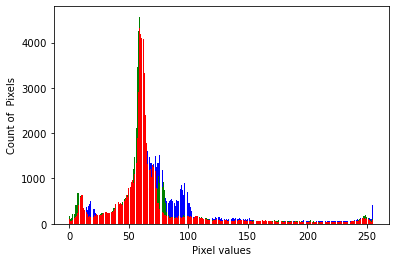

Frame Number 285


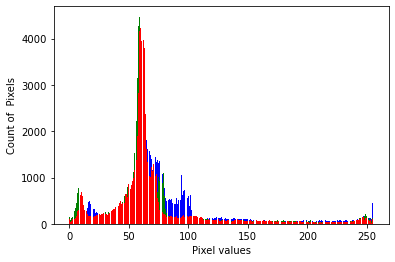

Frame Number 286


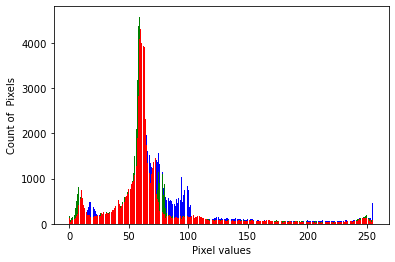

Frame Number 287


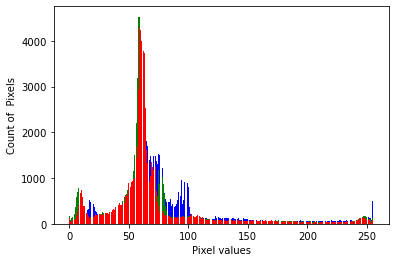

Frame Number 288


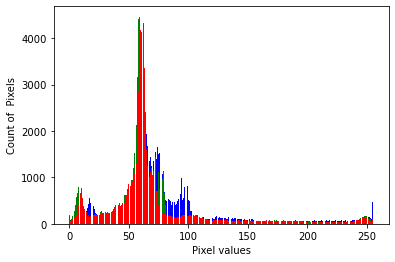

Frame Number 289


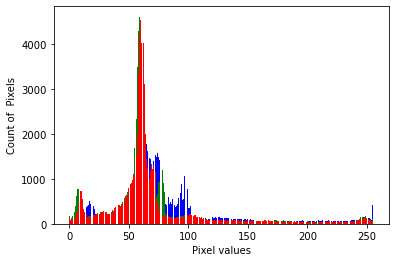

Frame Number 290


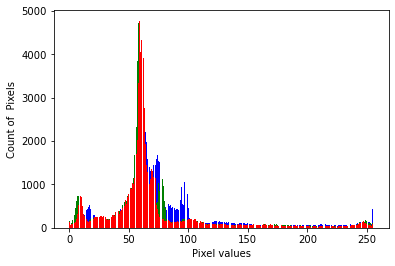

Frame Number 291


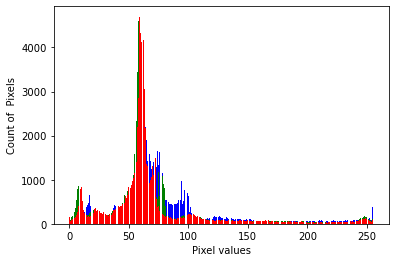

Frame Number 292


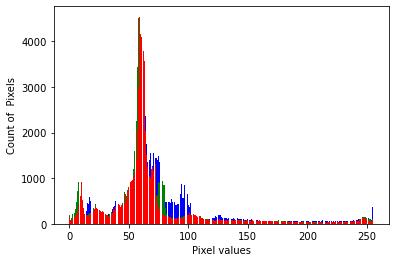

Frame Number 293


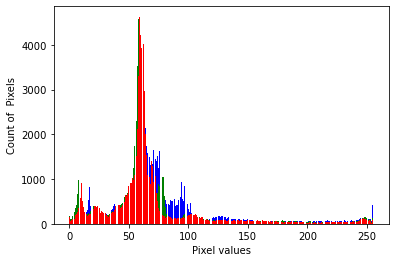

Frame Number 294


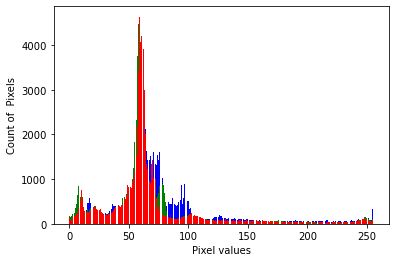

Frame Number 295


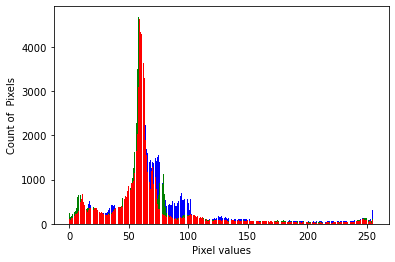

Frame Number 296


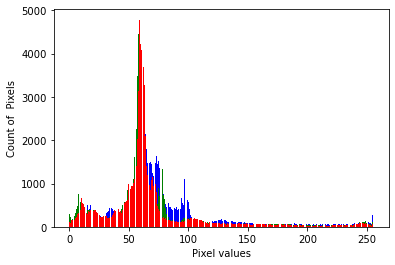

Frame Number 297


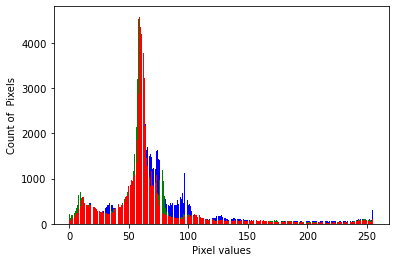

Frame Number 298


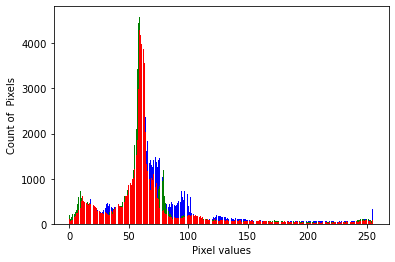

Frame Number 299


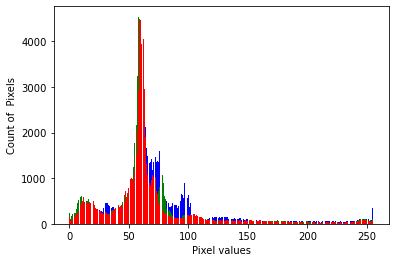

Frame Number 300


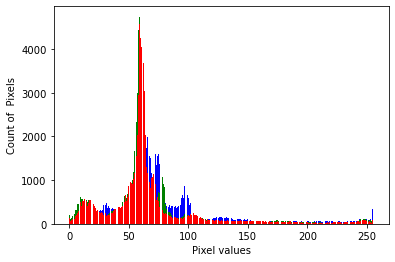

Frame Number 301


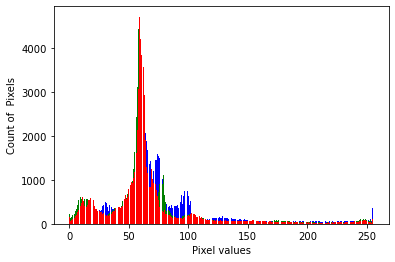

Frame Number 302


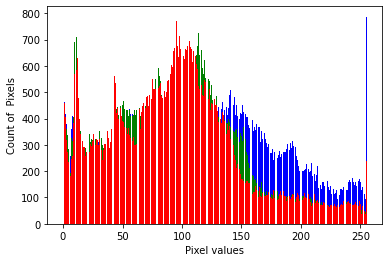

Frame Number 303


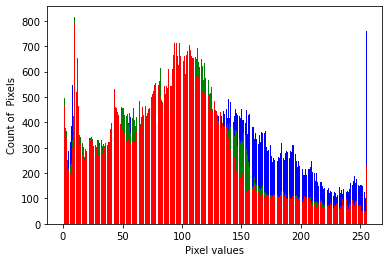

Frame Number 304


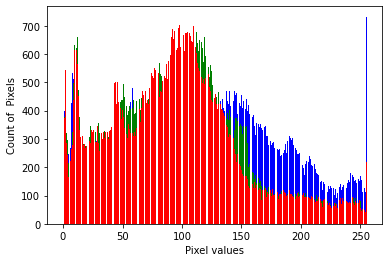

Frame Number 305


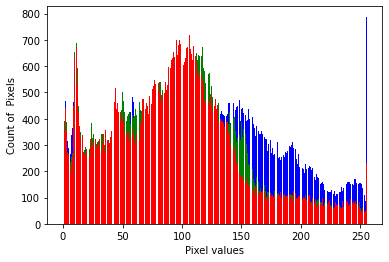

Frame Number 306


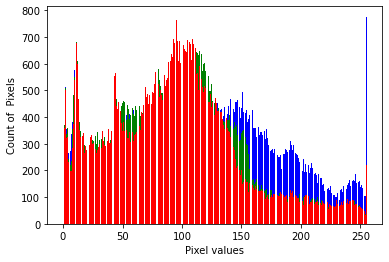

Frame Number 307


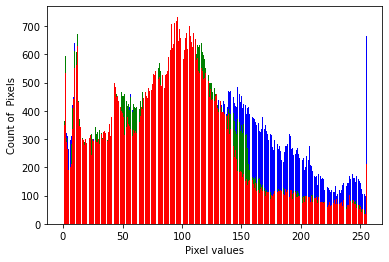

Frame Number 308


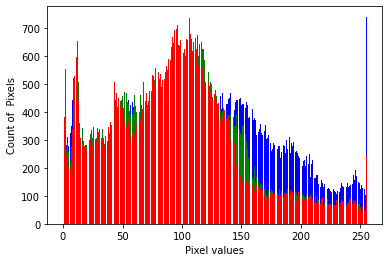

Frame Number 309


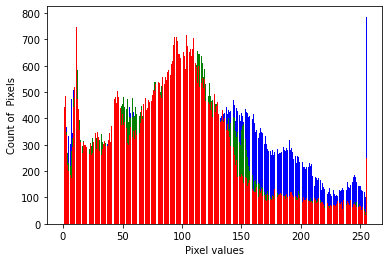

Frame Number 310


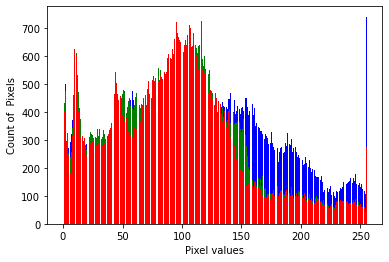

Frame Number 311


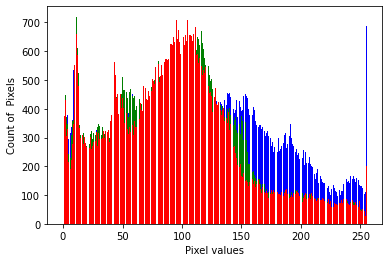

Frame Number 312


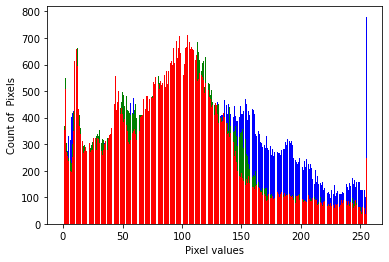

Frame Number 313


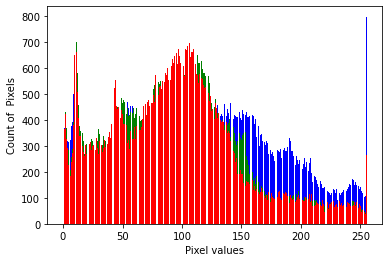

Frame Number 314


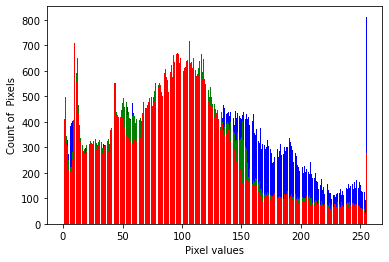

Frame Number 315


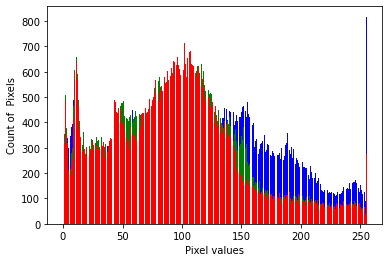

Frame Number 316


In [ ]:
#Calculating and plotting histograms of all the frames in the video
ICV_histogram_video_sequence(frames)

<b>b) Write a function that returns the value of the intersection of a pair of histograms. For a given video sequence, use the histogram intersection function to calculate the intersection between consecutive frames (e.g. between It and It+1, between It+1 and It+2 and so on). Find how to normalize the intersection. Does that change the results? Plot the intersection values over time and the normalised intersection values, and save the corresponding figures. Show and comment the figures in the report.</b>

In [ ]:
#Finding the intersection of a pair of histogram
blue,green, red  = ICV_histogram_intersection(blue_histogram_1, green_histogram_1, red_histogram_1, blue_histogram_2, green_histogram_2, red_histogram_2, True)


In [ ]:
#Histogram intersection between consecutive frames
blue_intersection, green_intersection, red_intersection = ICV_histogram_intersection_video(frames, True)

In [ ]:
number_of_pixels = np.array(frames).shape[1] * np.array(frames).shape[2]

#Normalizing histograms of different colour channesls
blue_intersections_normalized = ICV_normalize_histogram(blue_intersection, number_of_pixels)
green_intersections_normalized = ICV_normalize_histogram(green_intersection, number_of_pixels)
red_intersections_normalized = ICV_normalize_histogram(red_intersection, number_of_pixels)
 
#Normalized Histogram intersection between consecutive frames
ICV_plot_histogram(blue_intersections_normalized, green_intersections_normalized, red_intersections_normalized, "line", "intersections normalized")